<h1 style="text-align:center;"><strong>ASSIGNMENT 4</strong></h1>


<h4 style="text-align:center;"><strong>MOD300: Mandatory project 4</strong></h4>

<h4 style="text-align:center;"><strong>Group Members: Emad Omar Mohamed, Hassan Nehad Adnan, Sture Odin Domingos Troli</strong></h4>

<h5 style="text-align:center;">Dec 5, 2025</h5>

**Statement from the Group Members**

We used limited AI assistance in this project, mainly to help debug code or to find solutions to code where otherwise we were stuck (functions, clustering algorithms,training the LSMT, and plotting) and to format text so it displays correctly in the Jupyter notebook.

More specifically, our implementation is in Python using NumPy for array operations, scikit-learn for K-Means clustering, Matplotlib for plotting, and TensorFlow/Keras for neural networks and LSTM models, we were not successfull on all of it. We also used the mw_plot library for generating Milky Way visualizations as recommended in the Assignment 4 PDF. We used the free versions of Copilot and Gemini only to help debug several issues  that came up under the project (e.g., image array handling, cluster visualization, model training errors) and to fix some grammar mistakes in this report.

We used some of the provided functions/classes Assignment_4 notebook template as well as created our owns, and the covid19_solution example from last year for structuring our report (specifically the text parts and overall organization). We used AI tools to help typeset formulas and improve grammar and clarity, as English is our second language for some even third or foruth. 

We structured the report with an abstract, introduction, brief explanations of each task for both Topic 1 (Milky Way clustering) and Topic 2 (epidemic prediction), a conclusion, and a summary of each member's contributions. This is consistent with our previous projects, while keeping the length relatively short without losing overall quality.

All group members contributed to understanding the concepts, writing the code, and preparing this report. We believe this work represents our own learning and effort, with AI used only as a supporting tool for technical issues and language improvement.

<h4 style="text-align:center;"><strong>Abstract</strong></h4>

In this project, two topics were explored: unsupervised learning for galaxy image analysis and supervised learning for epidemic prediction (using some rpevious experience from Assignment 2 - task 5).

In Topic 1, we use "unsupervised learning" to study images of the Milky Way galaxy. We apply K-Means clustering to find different regions in the images without any labels. First, we create several pictures(4) of galaxy areas using the mw_plot Python library [1], with different centers (like M31, the Andromeda Galaxy) and different viewing sizes. We then change the images into RGB arrays, where each pixel has three numbers for Red, Green, and Blue - (RGB). We tested different ways to encode the data, including grayscale (brightness), brightness categories, and color-based groups.

Our K-Means results with 5-7 clusters work well to split the galaxy images into clear parts: dark background (space), bright stars, and middle areas like dust and gas clouds. When we tried different numbers of clusters, 3 clusters are too simple, and more than 10 clusters add too much noise. With 5-7 clusters, we get good results where about 45% of pixels are dark regions, 35% are medium brightness, and 20% are bright star areas.

We also compare two methods: using only color features (RGB) versus using color plus position (x, y coordinates). Adding position helps find connected regions, while color-only clustering better groups similar star types no matter where they are in the image [2]. The clusters we find do not automatically match real physical parts of the galaxy like spiral arms [3], but these methods are still useful for processing large amounts of astronomical data [4, 5].

In Topic 2, we compare different ways to predict epidemic spread, using Ebola data from West Africa . We first reproduced the SEIR compartment model from previous work, then train several machine learning models: linear regression, polynomial regression, a basic neural network, and an LSTM network for time series [6]. We used data from Guinea, Liberia, and Sierra Leone to test which method works best.

Our results show that no single method is best for everything. The SEIR model gives good predictions and is easy to understand because it uses real biology [7]. Linear regression is too simple for epidemic curves. Polynomial regression can fit the data well but may overfit. Neural networks can find complex patterns but are harder to interpret [8]. LSTM networks work well for time series but need more data to train properly.

The main lesson  from Topic 2 in our opininon and experience,  is that we cannot just ignore traditional models and only use machine learning. Mathematical models like SEIR help us understand why diseases spread, while ML models are better at finding patterns in data. The best approach combines both methods [7, 8].

Overall, this project shows that machine learning is a powerful tool for scientific problems [4], but it does has has its limits. In astronomy, clustering helps process millions of images [5, 6], but experts still need to interpret what the clusters mean. In epidemiology, ML can help with predictions, but domain knowledge is still needed to make good decisions. Both unsupervised and supervised learning work best when combined with human understanding.

#### **1 Introduction**

This project studies two topics: unsupervised learning for astronomy and supervised learning for epidemic prediction. In Topic 1, we use machine learning to find patterns in images of the Milky Way galaxy, which has about 100–400 billion stars in a spiral shape [1,5].

Because modern telescopes produce too much data to analyse by hand, we use unsupervised learning methods like K-Means clustering to group pixels by colour and brightness [2,4,6,7,8].
 
We create images with the Python library **mw_plot** [1], turn them into RGB numbers, and then cluster them to see what kinds of regions the computer can find. In Topic 2, we use supervised learning to predict how diseases spread, using data from the Ebola epidemic in West Africa.
 
We first reproduce results from a SEIR model [5], then test linear regression, polynomial regression, a simple neural network, and an LSTM network for time series data [7]. Our main goal is to see what these methods can do, where they fail, and how they can work together with traditional scientific models [4,5,6].

# Task 0
Task 0:  Install the python library from the page: milkyway-plot.readthedocs.io (from a jupyter notebook, run in a cell !pip  install mw_plot  Use a python environment! Ask 
the Tas in case of doubts)

In [4]:
## Task 0: Install Required Libraries
# We had to install(only once, in the first time) this library for Milky Way visualizations
# Install the missing dependencies

!pip install scikit-learn
!pip install bokeh
!pip install mw_plot
!pip install scikit-learn
!pip install tensorflow
!pip install astropy


In [3]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from mw_plot import MWFaceOn, MWSkyMap
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Importing the custom functions/ we didnt need to import nothing from PyGaLaXy as we have all the required functions in galaxy_functions_classes.py
from galaxy_functions_classes import *
from PyGaLaXy import *

# Initially PyGaLaxy was working but then , ( from PyGaLaXy import * ) stopped working, so we used this command instead
%run PyGaLaXy.ipynb

# Setting plot style
plt.style.use('default')
%matplotlib inline

print("This is a confirmation that all the libraries imported!")

ModuleNotFoundError: No module named 'PyGaLaXy'

## Task 1: Reproduce the Milky Way Image via MWSkyMap

We use the `mw_plot` package to generate a bird's eye view of the Milky Way galaxy.

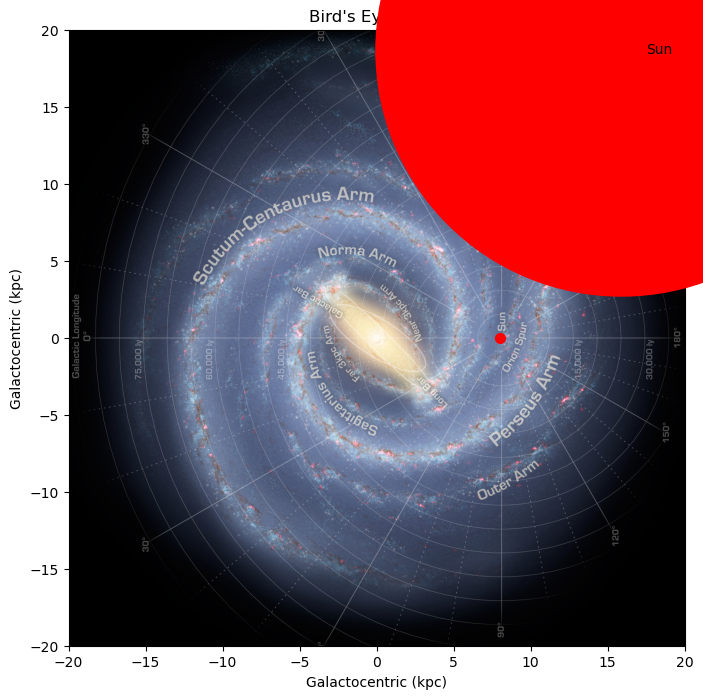

Task 1 Complete: Milky Way face-on view generated. As asked in task 1


In [5]:
# Task 1: Install the git package and reproduce the image of the milky way via MWSkyMap (see attached code). 
# in use PyGaLaXy.ipynb


mw_facedown = MWFaceOn(
    radius=20 * u.kpc,
    unit=u.kpc,
    coord="galactocentric",
    annotation=True,
    figsize=(10, 8),
)
mw_facedown.title = "Bird's Eyes View"

# Marking the Sun's position (approximately/cirka 8 kpc from galactic center)
mw_facedown.scatter(8 * u.kpc, 0 * u.kpc, c="r", s=50, label="Sun")

plt.show()
print("Task 1 Complete: Milky Way face-on view generated. As asked in task 1")

## Task 2: 
Generate a few (at least three in total) visualizations of the milky way sector starting in  different centers (try "M31") and with different radius (be careful on the units!).

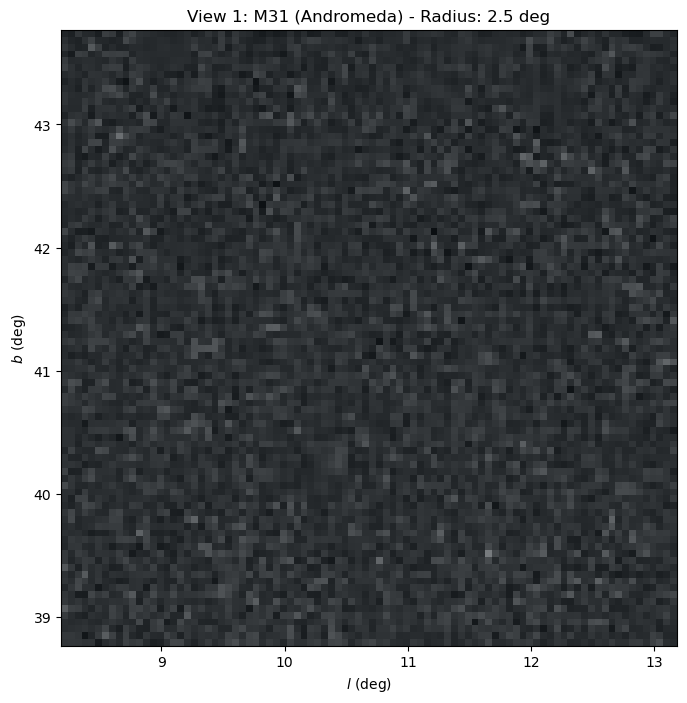

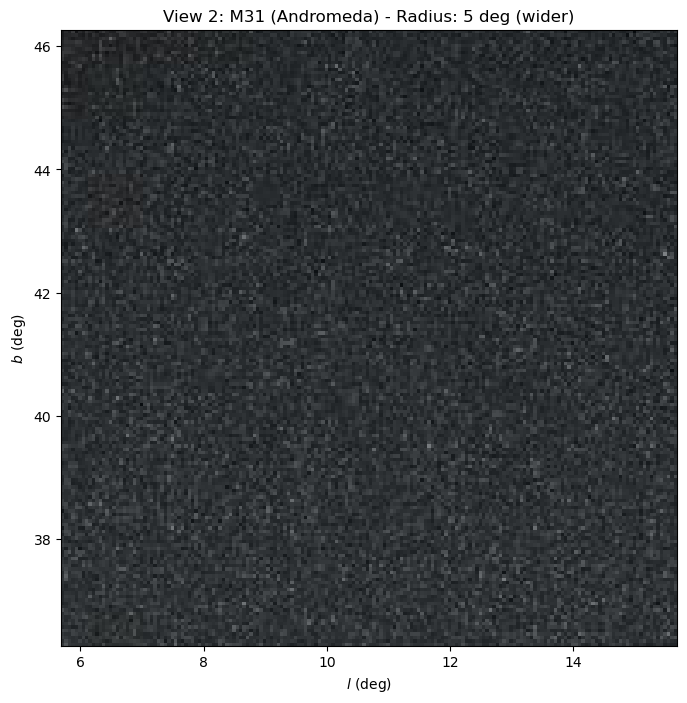

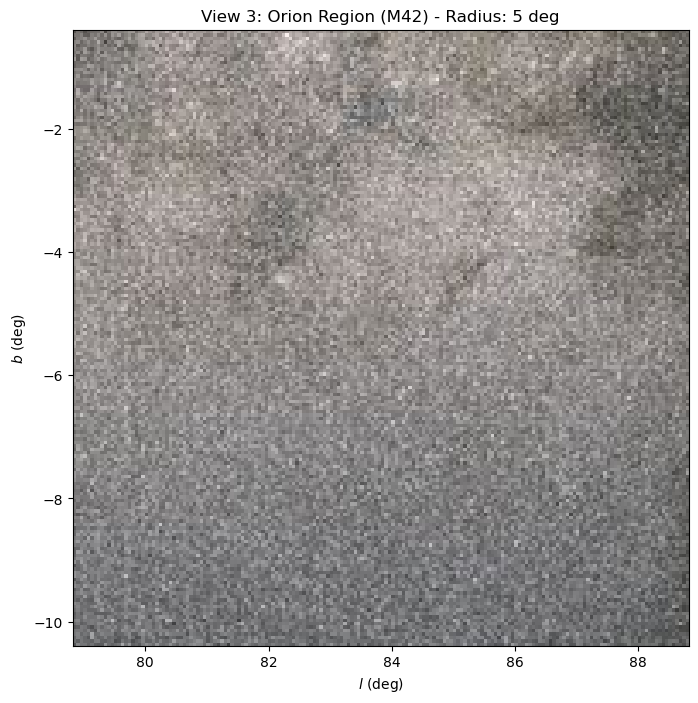

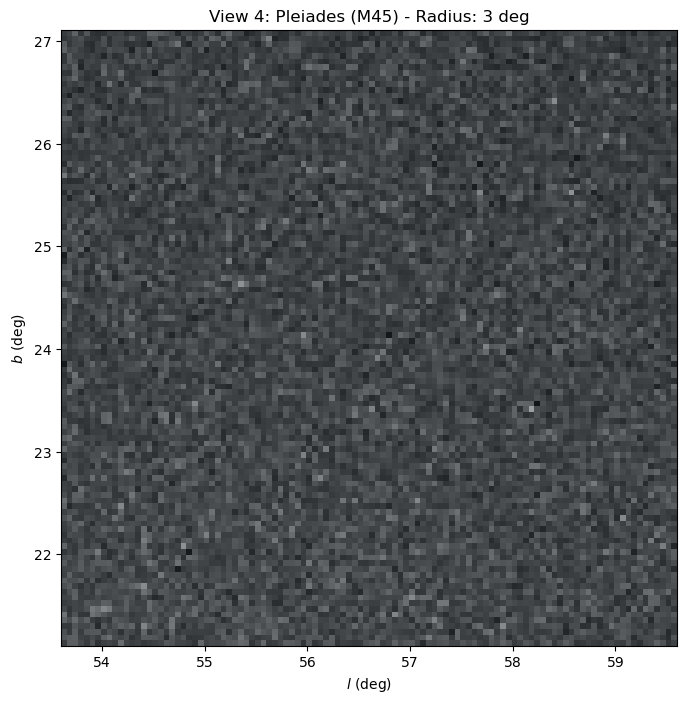

Task 2 Complete: Generated 4 different visualizations.(the minimum was technically 3 but we did one extra one)


In [6]:
# Task 2: Generate a few (at least three in total) visualizations of the milky way sector 
# starting in different centers and with different radius (be careful on the units!).

# The reason we are importing atropy and the other in each cell is because we were getting errors in each cell
# the original plan was to have all the imports in the intial cell(THE CELL ABOVE TASK 1) but it was not working properly

from astropy import units as u
from mw_plot import MWSkyMap
import matplotlib.pyplot as plt

# ########################################################################################################################
# View 1: M31 (Andromeda Galaxy) - close view
# M31 coordinates: RA = 10.6847°, Dec = 41.2687°
# ########################################################################################################################
mw1 = MWSkyMap(
    center=(10.6847, 41.2687) * u.deg,
    radius=(2.5, 2.5) * u.deg,
    background="optical",
)
fig1, ax1 = plt.subplots(figsize=(8, 8))
mw1.transform(ax1)
ax1.set_title("View 1: M31 (Andromeda) - Radius: 2.5 deg")
plt.show()
mw1.savefig('galaxy_m31.png')

# ########################################################################################################################
# View 2: M31 with larger radius (wider view)
# Same center, bigger radius
# ########################################################################################################################
mw2 = MWSkyMap(
    center=(10.6847, 41.2687) * u.deg,
    radius=(5, 5) * u.deg,  # Larger radius
    background="optical",
)
fig2, ax2 = plt.subplots(figsize=(8, 8))
mw2.transform(ax2)
ax2.set_title("View 2: M31 (Andromeda) - Radius: 5 deg (wider)")
plt.show()

# ########################################################################################################################
# View 3: Orion Region (M42)
# M42 coordinates: RA = 83.82°, Dec = -5.39°
# ########################################################################################################################
mw3 = MWSkyMap(
    center=(83.82, -5.39) * u.deg,
    radius=(5, 5) * u.deg,
    background="optical",
)
fig3, ax3 = plt.subplots(figsize=(8, 8))
mw3.transform(ax3)
ax3.set_title("View 3: Orion Region (M42) - Radius: 5 deg")
plt.show()

# ########################################################################################################################
# View 4 (We know the exercise only asked for 3 but we did one extra): Pleiades (M45)
# M45 coordinates: RA = 56.60°, Dec = 24.11°
# ########################################################################################################################
mw4 = MWSkyMap(
    center=(56.60, 24.11) * u.deg,
    radius=(3, 3) * u.deg,
    background="optical",
)
fig4, ax4 = plt.subplots(figsize=(8, 8))
mw4.transform(ax4)
ax4.set_title("View 4: Pleiades (M45) - Radius: 3 deg")
plt.show()

print("Task 2 Complete: Generated 4 different visualizations.(the minimum was technically 3 but we did one extra one)")

## Task 3: 
Convert the image generated into a rgb np.array (each pixel will be a list of 3 number, Red, Green, Blue (rbg). 

RGB ARRAY INFORMATION
Array Shape: (800, 800, 3)
  - Height: 800 pixels
  - Width: 800 pixels
  - Channels: 3 (R, G, B)
Data type: uint8
Value range: [0, 126]
Total pixels: 640,000


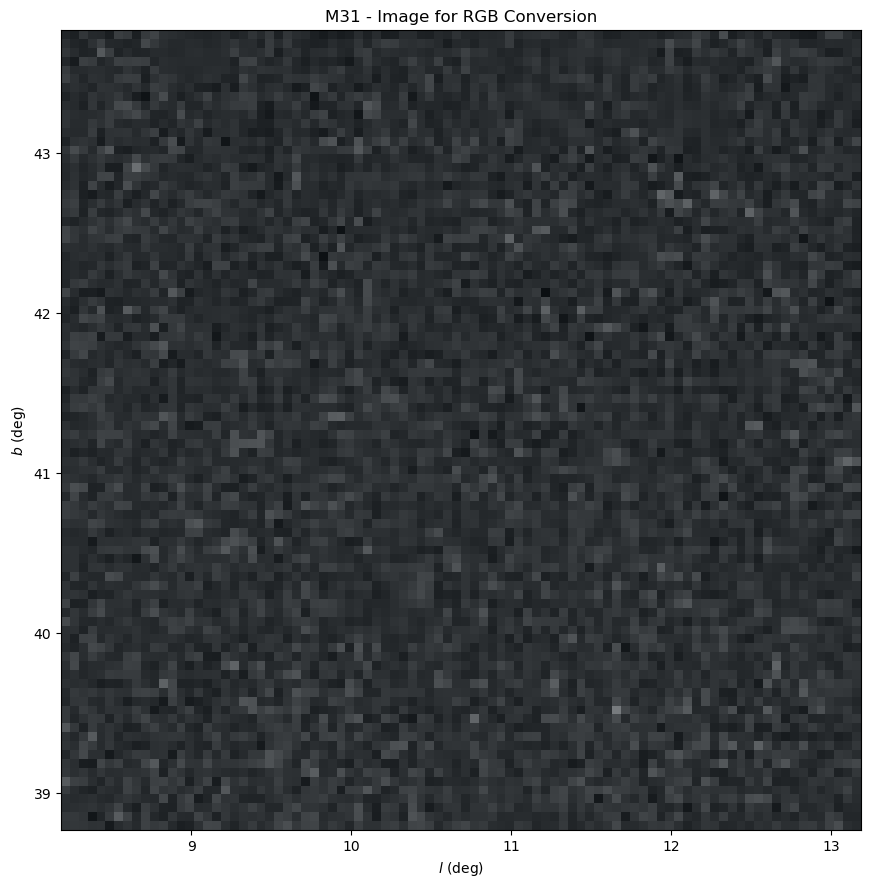

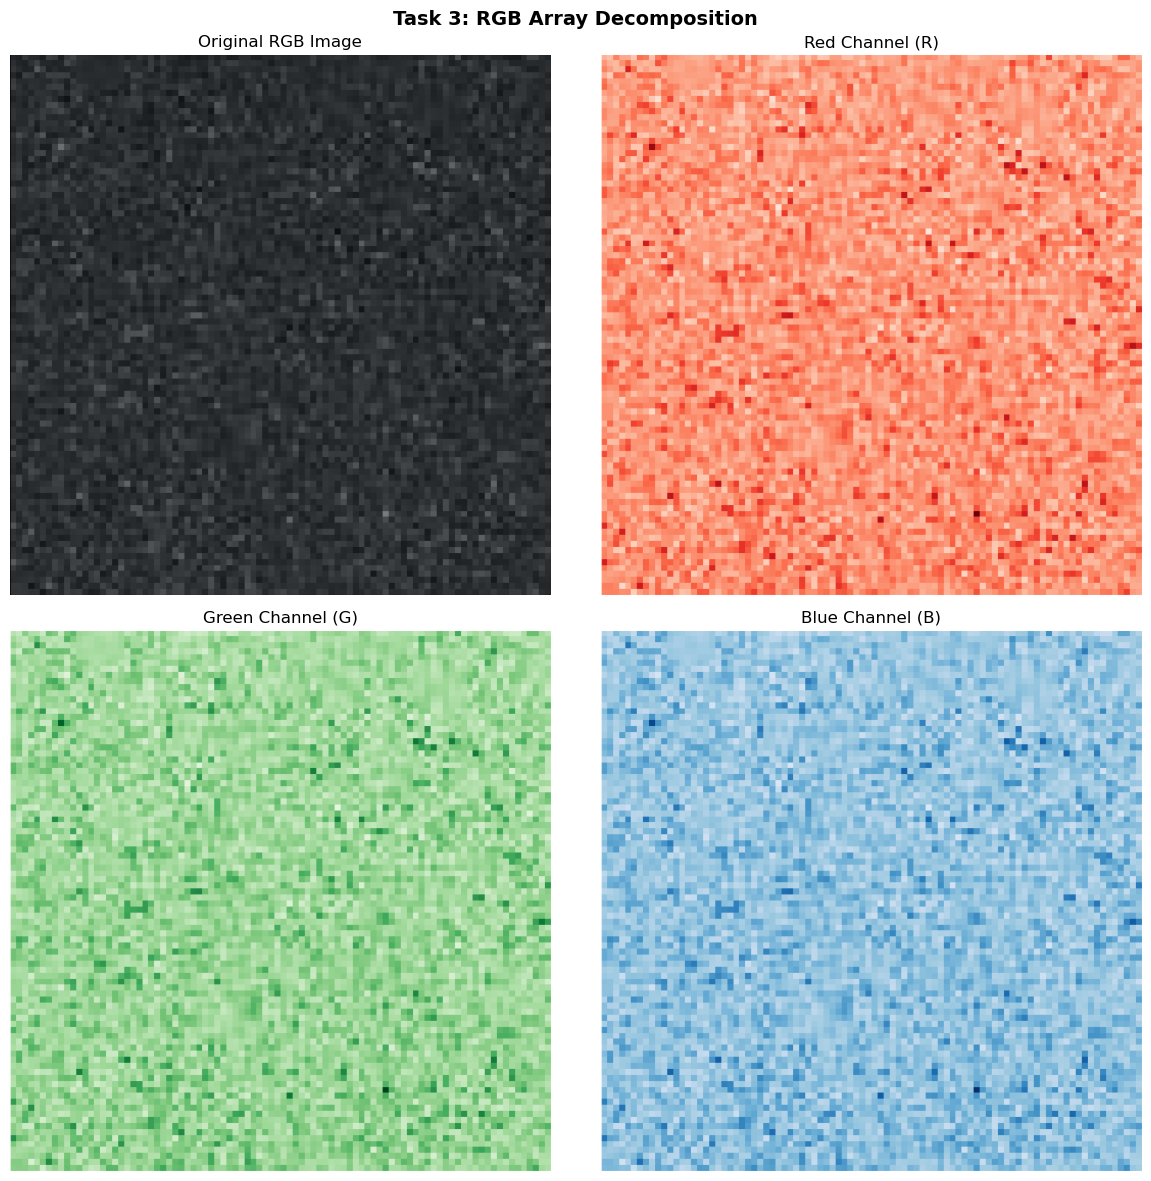


Sample pixel values (first 5x5 pixels, Red channel):
[[ 0  0  0  0  0]
 [ 0 29 31 31 31]
 [ 0 31 33 33 33]
 [ 0 31 33 33 33]
 [ 0 31 33 33 33]]

Sample pixel at position [100, 100]:
  Red:   24
  Green: 28
  Blue:  31

Task 3 Complete: Image converted to RGB numpy array.


In [7]:
# Task 3: Convert the image generated into a RGB np.array (each pixel will be a list of 3 numbers: Red, Green, Blue (rgb)).

# The reason we are importing numpy, matplotlib.pyplot, and the other libraries in each cell is because we were getting errors in each cell
# the original plan was to have all the imports in the intial cell(THE CELL ABOVE TASK 1) but it was not working properly

import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from mw_plot import MWSkyMap

# ########################################################################################################################
# Function to convert matplotlib figure to RGB array
# ########################################################################################################################
def plt2rgbarr(fig):
    """
    A function to transform a matplotlib figure to a 3D RGB np.array 

    Input
    -----
    fig: matplotlib.figure.Figure
        The plot that we want to encode.        

    Output
    ------
    np.array(height, width, 3): A 3D map of each pixel in RGB encoding
        - First dimension: height (rows)
        - Second dimension: width (columns)  
        - Third dimension: RGB values (3 channels)
    """
    # Removing padding around the axes for clean image
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
    fig.canvas.draw()
    
    # Getting the RGBA buffer from the canvas
    rgba_buf = fig.canvas.buffer_rgba()
    w, h = fig.canvas.get_width_height()
    
    # Converting buffer to numpy array and reshape
    rgba_arr = np.frombuffer(rgba_buf, dtype=np.uint8).reshape((h, w, 4))
    
    # Returning only RGB channels (drop alpha channel)
    return rgba_arr[:, :, :3].copy()

# ########################################################################################################################
# Generate a fresh figure for conversion
# Using M31 (Andromeda) as our main image
# ########################################################################################################################
mw_main = MWSkyMap(
    center=(10.6847, 41.2687) * u.deg,
    radius=(2.5, 2.5) * u.deg,
    background="optical",
)
fig_main, ax_main = plt.subplots(figsize=(8, 8))
mw_main.transform(ax_main)
ax_main.set_title("M31 - Image for RGB Conversion")

# ########################################################################################################################
# Convert to RGB array
# ########################################################################################################################
rgb_array = plt2rgbarr(fig_main)

# Display information about the array
print("=" * 60)
print("RGB ARRAY INFORMATION")
print("=" * 60)
print(f"Array Shape: {rgb_array.shape}")
print(f"  - Height: {rgb_array.shape[0]} pixels")
print(f"  - Width: {rgb_array.shape[1]} pixels")
print(f"  - Channels: {rgb_array.shape[2]} (R, G, B)")
print(f"Data type: {rgb_array.dtype}")
print(f"Value range: [{rgb_array.min()}, {rgb_array.max()}]")
print(f"Total pixels: {rgb_array.shape[0] * rgb_array.shape[1]:,}")
print("=" * 60)

# Show the original figure
plt.show()

# ########################################################################################################################
# Visualize the RGB array and individual channels
# ########################################################################################################################
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Original RGB image
axes[0, 0].imshow(rgb_array)
axes[0, 0].set_title("Original RGB Image")
axes[0, 0].axis('off')

# Red channel
axes[0, 1].imshow(rgb_array[:, :, 0], cmap='Reds')
axes[0, 1].set_title("Red Channel (R)")
axes[0, 1].axis('off')

# Green channel
axes[1, 0].imshow(rgb_array[:, :, 1], cmap='Greens')
axes[1, 0].set_title("Green Channel (G)")
axes[1, 0].axis('off')

# Blue channel
axes[1, 1].imshow(rgb_array[:, :, 2], cmap='Blues')
axes[1, 1].set_title("Blue Channel (B)")
axes[1, 1].axis('off')

plt.suptitle("Task 3: RGB Array Decomposition", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ########################################################################################################################
# Show a sample of pixel values
# ########################################################################################################################
print("\nSample pixel values (first 5x5 pixels, Red channel):")
print(rgb_array[:5, :5, 0])

print("\nSample pixel at position [100, 100]:")
print(f"  Red:   {rgb_array[100, 100, 0]}")
print(f"  Green: {rgb_array[100, 100, 1]}")
print(f"  Blue:  {rgb_array[100, 100, 2]}")

# Close the main figure to free memory
plt.close(fig_main)

print("\nTask 3 Complete: Image converted to RGB numpy array.")

## Task 4: 
Ideate, describe in words and generate a set of categories from the task 3 data (e.g. red? Grey? ). This is your encoding.

The The encoded data (grey_encoding, brightness_encoding, color_encoding) was used in Task 5 for clustering.

ENCODING 1: GRAYSCALE
Shape: (800, 800)
Value range: [0.00, 122.15]
Mean brightness: 47.52

ENCODING 2: BRIGHTNESS CATEGORIES
Number of categories: 3
Thresholds: [ 51. 102. 153. 204.]

Category distribution:
  Category 0 (Very Dark): 416,828 pixels (65.13%)
  Category 1 (Dark): 223,019 pixels (34.85%)
  Category 2 (Medium): 153 pixels (0.02%)
  Category 3 (Bright): 0 pixels (0.00%)
  Category 4 (Very Bright): 0 pixels (0.00%)

ENCODING 3: COLOR CATEGORIES
Number of categories: 2

Category distribution:
  Category 0 (Dark): 397,353 pixels (62.09%)
  Category 1 (Red Dominant): 0 pixels (0.00%)
  Category 2 (Green Dominant): 0 pixels (0.00%)
  Category 3 (Blue Dominant): 242,647 pixels (37.91%)
  Category 4 (Bright/White): 0 pixels (0.00%)


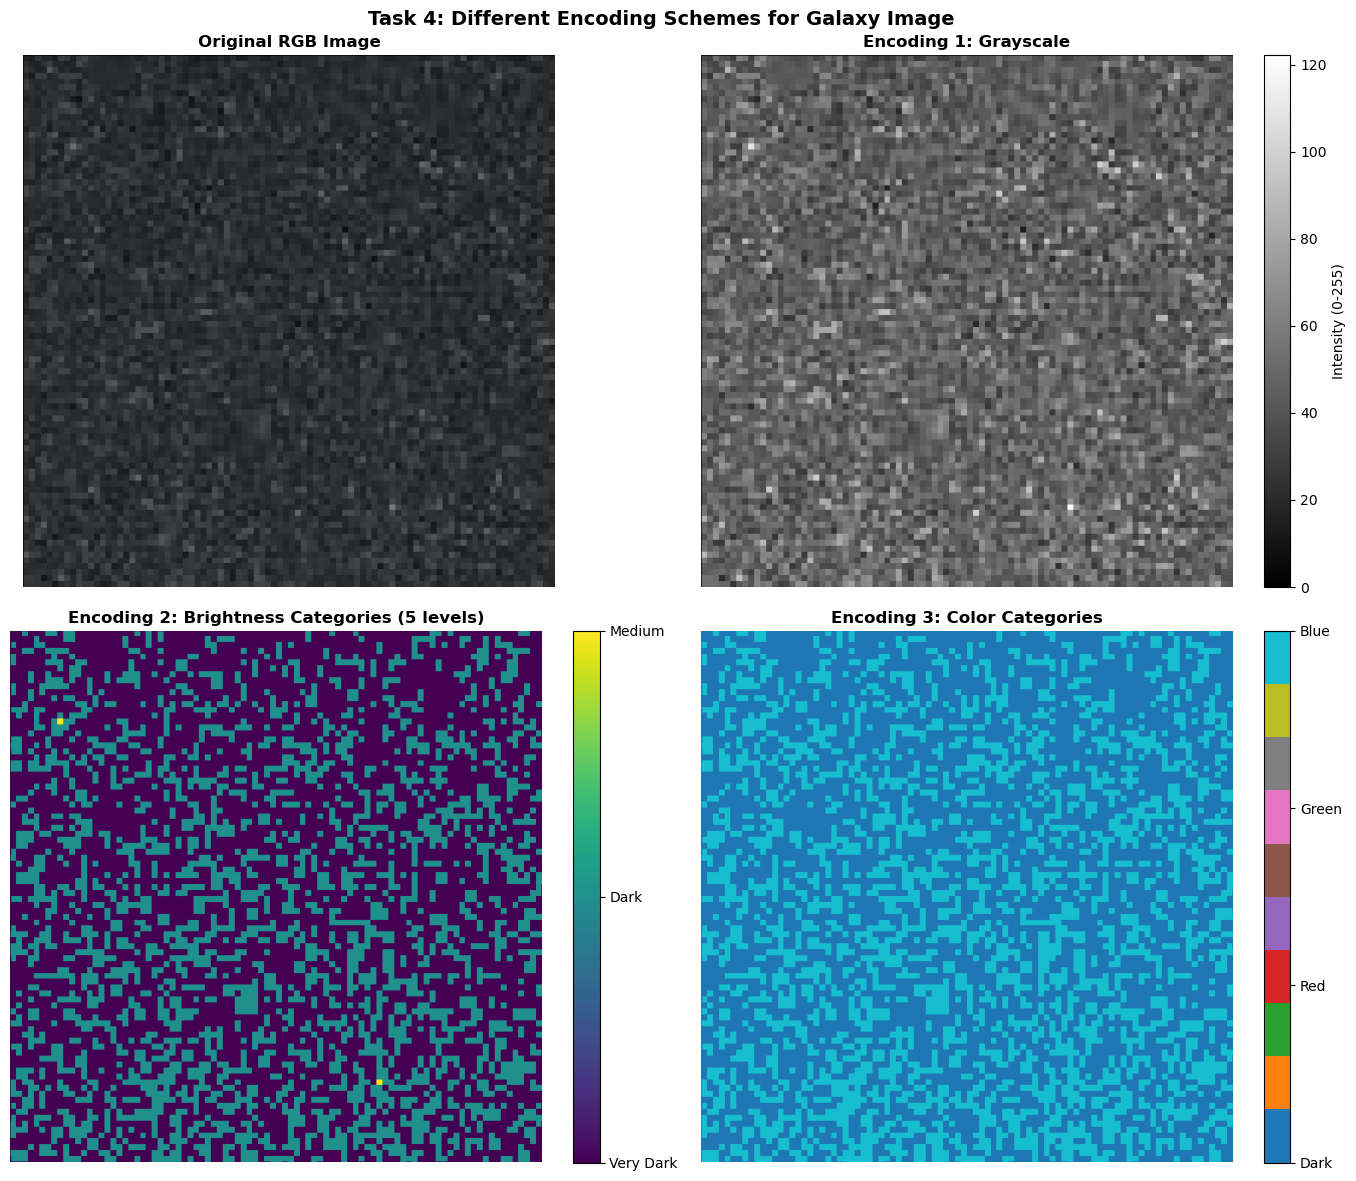

In [8]:

# Task 4: Ideate, describe in words and generate a set of categories from the task 3 data (e.g. red? Grey?). This is your encoding.

# The reason we are importing numpy, matplotlib.pyplot, and the other libraries in each cell is because we were getting errors in each cell
# the original plan was to have all the imports in the intial cell(THE CELL ABOVE TASK 1) but it was not working properly

import numpy as np
import matplotlib.pyplot as plt

# ########################################################################################################
# ENCODING 1: Grayscale Encoding
# ########################################################################################################
def encode_grey(rgb_array):
    """
    Converting RGB array to grayscale using standard luminosity weights.
    
    The weights (0.299, 0.587, 0.114) are based on human eye sensitivity:
    - Human eyes are most sensitive to green
    - Less sensitive to red
    - Least sensitive to blue
    
    Parameters
    ----------
    rgb_array : np.ndarray
        3D array of shape (height, width, 3) with RGB values (0-255)
        
    Returns
    -------
    np.ndarray
        2D array of shape (height, width) with grayscale values (0-255)
    """
    # Standard luminosity weights for RGB to grayscale conversion
    weights = np.array([0.299, 0.587, 0.114])
    grey = np.sum(rgb_array * weights, axis=2)
    return grey

# #########################################################################################################
# ENCODING 2: Brightness Categories
# #########################################################################################################
def encode_brightness_category(rgb_array, n_categories=5):
    """
    Encode pixels into discrete brightness categories.
    
    Categories divide the brightness range (0-255) into equal segments:
    - Category 0: Very Dark (0-51)
    - Category 1: Dark (51-102)
    - Category 2: Medium (102-153)
    - Category 3: Bright (153-204)
    - Category 4: Very Bright (204-255)
    
    Parameters
    ----------
    rgb_array : np.ndarray
        3D array of shape (height, width, 3) with RGB values
    n_categories : int
        Number of brightness categories (default: 5)
        
    Returns
    -------
    np.ndarray
        2D array with category labels (0 to n_categories-1)
    """
    # First convert to grayscale
    grey = encode_grey(rgb_array)
    
    # Calculate thresholds for equal-width bins
    thresholds = np.linspace(0, 255, n_categories + 1)[1:-1]
    
    # Assign categories
    categories = np.zeros_like(grey, dtype=int)
    for i, threshold in enumerate(thresholds):
        categories[grey > threshold] = i + 1
        
    return categories, thresholds

# #########################################################################################################
# ENCODING 3: Color Categories
# #########################################################################################################
def encode_color_category(rgb_array):
    """
    Encode pixels into color categories based on dominant RGB channel.
    
    Categories:
    - 0: Dark (all channels below dark_threshold)
    - 1: Red dominant (R > G and R > B)
    - 2: Green dominant (G > R and G > B)
    - 3: Blue dominant (B > R and B > G)
    - 4: Bright/White (all channels above bright_threshold)
    
    Parameters
    ----------
    rgb_array : np.ndarray
        3D array of shape (height, width, 3) with RGB values
        
    Returns
    -------
    tuple
        (category_array, category_labels_dict)
    """
    # Extract individual channels
    r = rgb_array[:, :, 0].astype(float)
    g = rgb_array[:, :, 1].astype(float)
    b = rgb_array[:, :, 2].astype(float)
    
    # Calculate grayscale for brightness check
    grey = encode_grey(rgb_array)
    
    # Initialize categories array
    categories = np.zeros(rgb_array.shape[:2], dtype=int)
    
    # Define thresholds
    dark_threshold = 50
    bright_threshold = 200
    
    # Category 0: Dark pixels
    categories[grey < dark_threshold] = 0
    
    # Category 4: Bright/White pixels (all channels high)
    is_bright = (r > bright_threshold) & (g > bright_threshold) & (b > bright_threshold)
    categories[is_bright] = 4
    
    # For remaining pixels, find dominant color
    mask_middle = (grey >= dark_threshold) & (~is_bright)
    
    # Category 1: Red dominant
    red_dominant = mask_middle & (r > g) & (r > b)
    categories[red_dominant] = 1
    
    # Category 2: Green dominant
    green_dominant = mask_middle & (g > r) & (g > b)
    categories[green_dominant] = 2
    
    # Category 3: Blue dominant
    blue_dominant = mask_middle & (b > r) & (b > g)
    categories[blue_dominant] = 3
    
    # Labels dictionary for reference
    labels = {
        0: "Dark",
        1: "Red Dominant",
        2: "Green Dominant",
        3: "Blue Dominant",
        4: "Bright/White"
    }
    
    return categories, labels

# #########################################################################################################
# Apply all encodings to our rgb_array
# #########################################################################################################

# Encoding 1: Grayscale
grey_encoding = encode_grey(rgb_array)
print("=" * 60)
print("ENCODING 1: GRAYSCALE")
print("=" * 60)
print(f"Shape: {grey_encoding.shape}")
print(f"Value range: [{grey_encoding.min():.2f}, {grey_encoding.max():.2f}]")
print(f"Mean brightness: {grey_encoding.mean():.2f}")
print("=" * 60)

# Encoding 2: Brightness Categories
brightness_encoding, thresholds = encode_brightness_category(rgb_array, n_categories=5)
print("\nENCODING 2: BRIGHTNESS CATEGORIES")
print("=" * 60)
print(f"Number of categories: {len(np.unique(brightness_encoding))}")
print(f"Thresholds: {thresholds}")
print("\nCategory distribution:")
for cat in range(5):
    count = np.sum(brightness_encoding == cat)
    percentage = 100 * count / brightness_encoding.size
    cat_names = ["Very Dark", "Dark", "Medium", "Bright", "Very Bright"]
    print(f"  Category {cat} ({cat_names[cat]}): {count:,} pixels ({percentage:.2f}%)")
print("=" * 60)

# Encoding 3: Color Categories
color_encoding, color_labels = encode_color_category(rgb_array)
print("\nENCODING 3: COLOR CATEGORIES")
print("=" * 60)
print(f"Number of categories: {len(np.unique(color_encoding))}")
print("\nCategory distribution:")
for cat_id, label in color_labels.items():
    count = np.sum(color_encoding == cat_id)
    percentage = 100 * count / color_encoding.size
    print(f"  Category {cat_id} ({label}): {count:,} pixels ({percentage:.2f}%)")
print("=" * 60)

# #########################################################################################################
# Visualize all encodings
# #########################################################################################################
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Original RGB image
axes[0, 0].imshow(rgb_array)
axes[0, 0].set_title("Original RGB Image", fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

# Grayscale encoding
im1 = axes[0, 1].imshow(grey_encoding, cmap='gray')
axes[0, 1].set_title("Encoding 1: Grayscale", fontsize=12, fontweight='bold')
axes[0, 1].axis('off')
plt.colorbar(im1, ax=axes[0, 1], fraction=0.046, label='Intensity (0-255)')

# Brightness categories
im2 = axes[1, 0].imshow(brightness_encoding, cmap='viridis')
axes[1, 0].set_title("Encoding 2: Brightness Categories (5 levels)", fontsize=12, fontweight='bold')
axes[1, 0].axis('off')
cbar2 = plt.colorbar(im2, ax=axes[1, 0], fraction=0.046, ticks=[0, 1, 2, 3, 4])
cbar2.ax.set_yticklabels(['Very Dark', 'Dark', 'Medium', 'Bright', 'Very Bright'])

# Color categories
im3 = axes[1, 1].imshow(color_encoding, cmap='tab10')
axes[1, 1].set_title("Encoding 3: Color Categories", fontsize=12, fontweight='bold')
axes[1, 1].axis('off')
cbar3 = plt.colorbar(im3, ax=axes[1, 1], fraction=0.046, ticks=[0, 1, 2, 3, 4])
cbar3.ax.set_yticklabels(['Dark', 'Red', 'Green', 'Blue', 'Bright'])

plt.suptitle("Task 4: Different Encoding Schemes for Galaxy Image", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()




## Task 5

Use K-NN (Nearest neighbor, not discussed in class but extremely simple) or K-means to cluster the data

CLUSTERING EXPERIMENT 1: K-Means with 5 clusters (RGB features only)
------------------------------------------------------------
CLUSTER ANALYSIS SUMMARY
Number of clusters: 5
Total pixels: 640,000

Cluster distribution:
  Cluster 0: 83,658 pixels (13.07%)
  Cluster 1: 238,846 pixels (37.32%)
  Cluster 2: 180,024 pixels (28.13%)
  Cluster 3: 113,914 pixels (17.80%)
  Cluster 4: 23,558 pixels (3.68%)

CLUSTERING EXPERIMENT 2: K-Means with 7 clusters (RGB features only)
------------------------------------------------------------
CLUSTER ANALYSIS SUMMARY
Number of clusters: 7
Total pixels: 640,000

Cluster distribution:
  Cluster 0: 184,635 pixels (28.85%)
  Cluster 1: 54,583 pixels (8.53%)
  Cluster 2: 113,486 pixels (17.73%)
  Cluster 3: 1,761 pixels (0.28%)
  Cluster 4: 176,388 pixels (27.56%)
  Cluster 5: 14,359 pixels (2.24%)
  Cluster 6: 94,788 pixels (14.81%)

CLUSTERING EXPERIMENT 3: K-Means with 5 clusters (RGB + Position)
-------------------------------------------------------

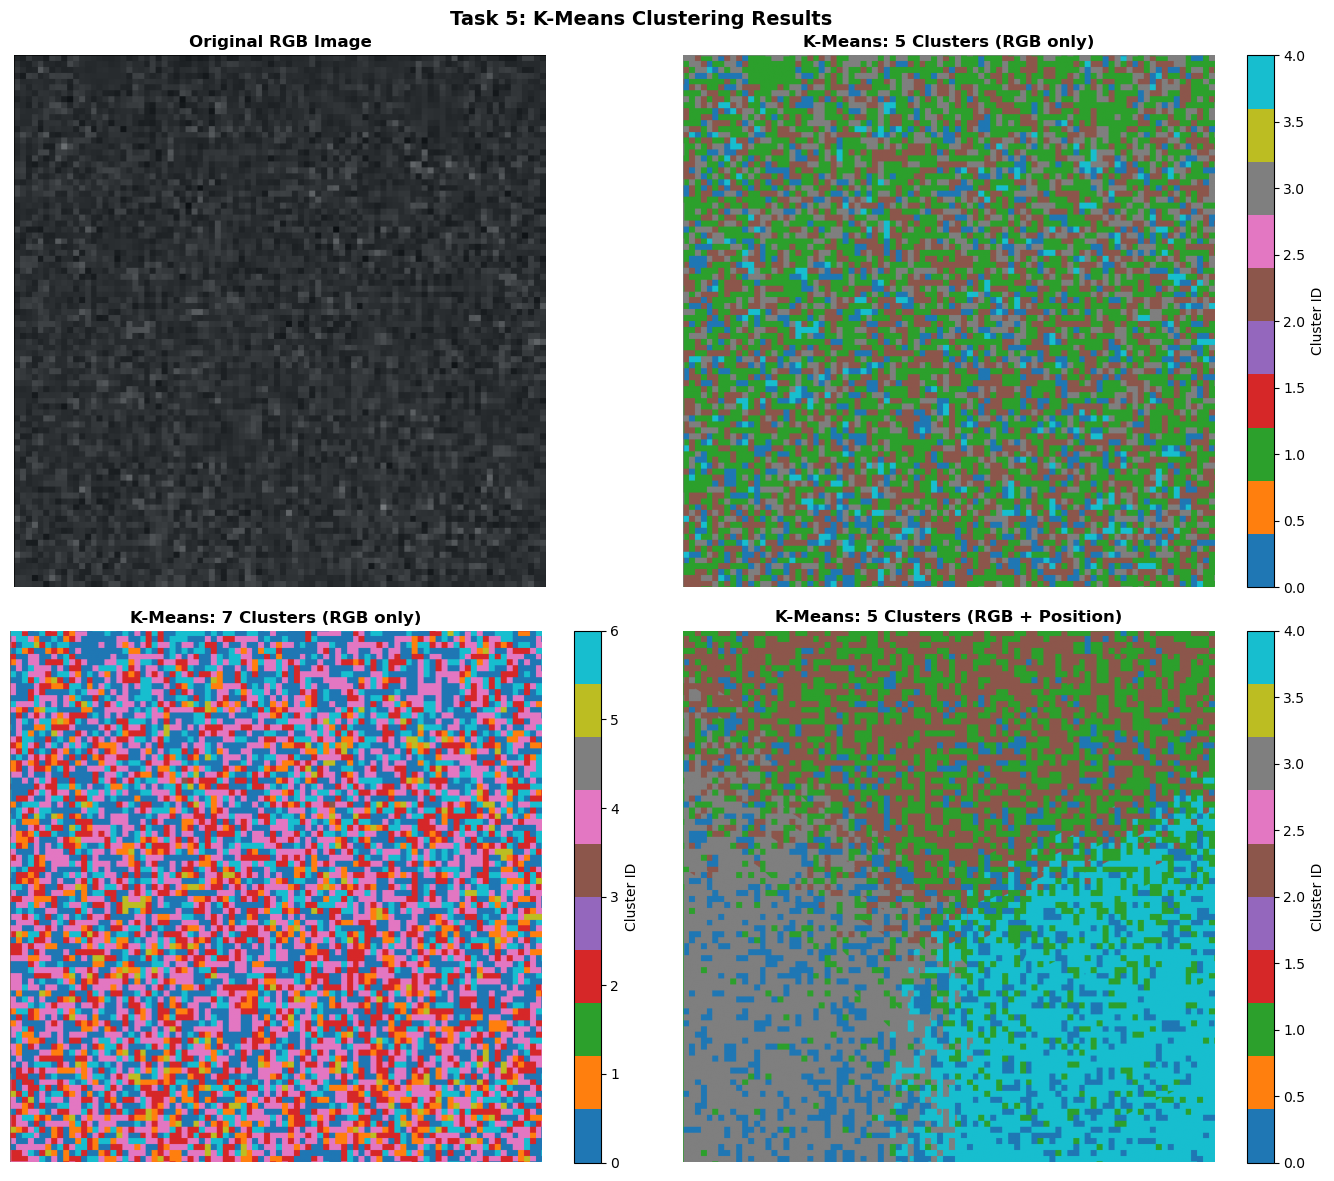


COMPARING DIFFERENT CLUSTER COUNTS


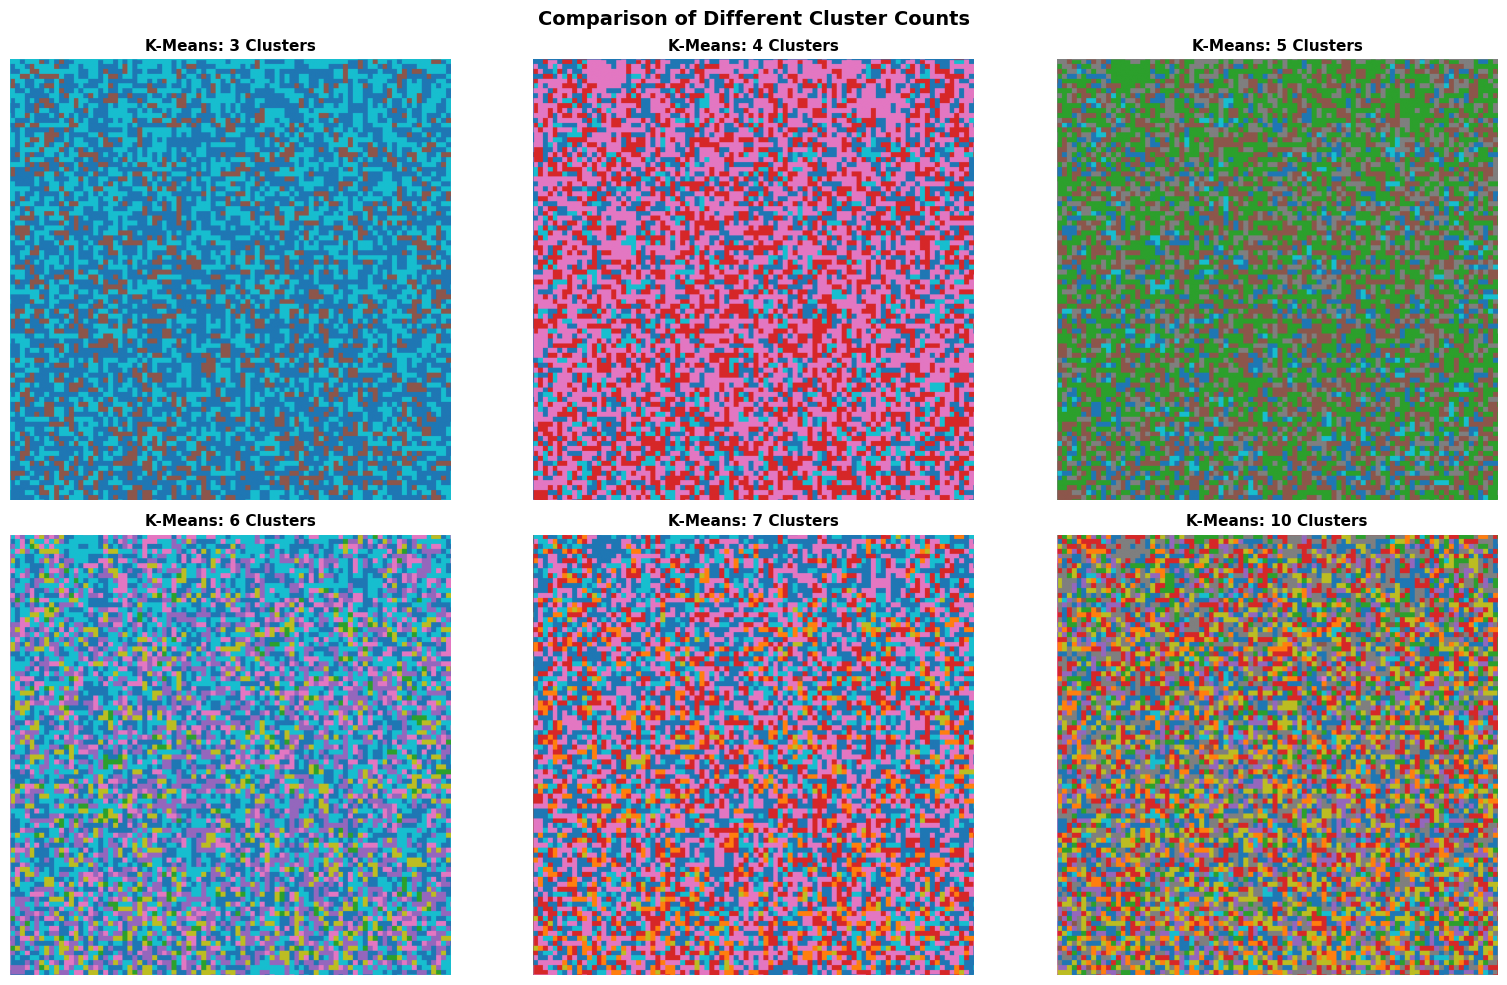


CLUSTER ANALYSIS: What does each cluster represent?

Mean RGB values for each cluster (5-cluster solution):
------------------------------------------------------------
Cluster 0:
  Mean RGB: (59.5, 63.5, 66.5)
  Mean Brightness: 62.7
  Interpretation: Dim regions

Cluster 1:
  Mean RGB: (39.6, 43.6, 46.6)
  Mean Brightness: 42.8
  Interpretation: Dark space / Background

Cluster 2:
  Mean RGB: (49.0, 53.0, 56.0)
  Mean Brightness: 52.1
  Interpretation: Dim regions

Cluster 3:
  Mean RGB: (29.5, 33.5, 36.4)
  Mean Brightness: 32.6
  Interpretation: Dark space / Background

Cluster 4:
  Mean RGB: (75.4, 79.4, 82.4)
  Mean Brightness: 78.6
  Interpretation: Dim regions



In [9]:
# Task 5: Use K-NN (Nearest neighbor, not discussed in class but extremely simple) or K-means to cluster the data

# The reason we are importing numpy, matplotlib.pyplot, and the other libraries in each cell is because we were getting errors in each cell
# the original plan was to have all the imports in the intial cell(THE CELL ABOVE TASK 1) but it was not working properly

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ###################################################################################################################################
# Function to perform K-Means clustering on RGB array
# ###################################################################################################################################
def cluster_kmeans(rgb_array, n_clusters=5, include_position=False, random_state=42):
    """
    Perform K-Means clustering on pixel data.
    
    Parameters
    ----------
    rgb_array : np.ndarray
        3D RGB array of shape (height, width, 3)
    n_clusters : int
        Number of clusters to create
    include_position : bool
        If True, include (x, y) pixel position as features
    random_state : int
        Random seed for reproducibility
        
    Returns
    -------
    tuple
        (cluster_labels_2d, kmeans_model) - Labels reshaped to image dimensions and the model
    """
    h, w = rgb_array.shape[:2]
    
    # Flatten RGB array to 2D: (n_pixels, 3)
    features = rgb_array.reshape(-1, 3).astype(float)
    
    if include_position:
        # Create coordinate grids
        y_coords, x_coords = np.mgrid[0:h, 0:w]
        x_flat = x_coords.flatten()
        y_flat = y_coords.flatten()
        
        # Normalize position to same scale as color values (0-255)
        x_norm = (x_flat / w) * 255
        y_norm = (y_flat / h) * 255
        
        # Add position to features
        features = np.column_stack([features, x_norm, y_norm])
    
    # Standardize features (important for K-Means)
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    labels = kmeans.fit_predict(features_scaled)
    
    # Reshape labels back to image dimensions
    labels_2d = labels.reshape(h, w)
    
    return labels_2d, kmeans

# ###################################################################################################################################
# Function to get cluster statistics
# ###################################################################################################################################
def get_cluster_statistics(cluster_labels):
    """
    Calculate statistics about cluster distribution.
    
    Parameters
    ----------
    cluster_labels : np.ndarray
        2D array of cluster labels
        
    Returns
    -------
    dict
        Dictionary with cluster statistics
    """
    unique, counts = np.unique(cluster_labels, return_counts=True)
    total = cluster_labels.size
    
    stats = {
        "n_clusters": len(unique),
        "total_pixels": total,
        "cluster_counts": dict(zip(unique.tolist(), counts.tolist())),
        "cluster_percentages": {
            int(u): round(100 * c / total, 2) 
            for u, c in zip(unique, counts)
        }
    }
    
    return stats

# ###################################################################################################################################
# Function to print cluster summary
# ###################################################################################################################################
def print_cluster_summary(stats):
    """Print a formatted summary of cluster statistics."""
    print("=" * 60)
    print("CLUSTER ANALYSIS SUMMARY")
    print("=" * 60)
    print(f"Number of clusters: {stats['n_clusters']}")
    print(f"Total pixels: {stats['total_pixels']:,}")
    print(f"\nCluster distribution:")
    for cluster_id, percentage in stats['cluster_percentages'].items():
        count = stats['cluster_counts'][cluster_id]
        print(f"  Cluster {cluster_id}: {count:,} pixels ({percentage:.2f}%)")
    print("=" * 60)

# ###################################################################################################################################
# CLUSTERING EXPERIMENT 1: K-Means with 5 clusters (RGB only)
# ###################################################################################################################################
print("CLUSTERING EXPERIMENT 1: K-Means with 5 clusters (RGB features only)")
print("-" * 60)

n_clusters = 5
cluster_labels_5, kmeans_model_5 = cluster_kmeans(
    rgb_array, 
    n_clusters=n_clusters, 
    include_position=False
)

# Print statistics
stats_5 = get_cluster_statistics(cluster_labels_5)
print_cluster_summary(stats_5)

# ###################################################################################################################################
# CLUSTERING EXPERIMENT 2: K-Means with 7 clusters (RGB only)
# ###################################################################################################################################
print("\nCLUSTERING EXPERIMENT 2: K-Means with 7 clusters (RGB features only)")
print("-" * 60)

cluster_labels_7, kmeans_model_7 = cluster_kmeans(
    rgb_array, 
    n_clusters=7, 
    include_position=False
)

stats_7 = get_cluster_statistics(cluster_labels_7)
print_cluster_summary(stats_7)

# ###################################################################################################################################
# CLUSTERING EXPERIMENT 3: K-Means with position features
# ###################################################################################################################################
print("\nCLUSTERING EXPERIMENT 3: K-Means with 5 clusters (RGB + Position)")
print("-" * 60)

cluster_labels_pos, kmeans_model_pos = cluster_kmeans(
    rgb_array, 
    n_clusters=5, 
    include_position=True
)

stats_pos = get_cluster_statistics(cluster_labels_pos)
print_cluster_summary(stats_pos)

# ###################################################################################################################################
# Visualize clustering results
# ###################################################################################################################################
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Original image
axes[0, 0].imshow(rgb_array)
axes[0, 0].set_title("Original RGB Image", fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

# 5 clusters (RGB only)
im1 = axes[0, 1].imshow(cluster_labels_5, cmap='tab10')
axes[0, 1].set_title("K-Means: 5 Clusters (RGB only)", fontsize=12, fontweight='bold')
axes[0, 1].axis('off')
plt.colorbar(im1, ax=axes[0, 1], fraction=0.046, label='Cluster ID')

# 7 clusters (RGB only)
im2 = axes[1, 0].imshow(cluster_labels_7, cmap='tab10')
axes[1, 0].set_title("K-Means: 7 Clusters (RGB only)", fontsize=12, fontweight='bold')
axes[1, 0].axis('off')
plt.colorbar(im2, ax=axes[1, 0], fraction=0.046, label='Cluster ID')

# 5 clusters (RGB + Position)
im3 = axes[1, 1].imshow(cluster_labels_pos, cmap='tab10')
axes[1, 1].set_title("K-Means: 5 Clusters (RGB + Position)", fontsize=12, fontweight='bold')
axes[1, 1].axis('off')
plt.colorbar(im3, ax=axes[1, 1], fraction=0.046, label='Cluster ID')

plt.suptitle("Task 5: K-Means Clustering Results", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ###################################################################################################################################
# Compare different numbers of clusters
# ###################################################################################################################################
print("\n" + "=" * 60)
print("COMPARING DIFFERENT CLUSTER COUNTS")
print("=" * 60)

fig2, axes2 = plt.subplots(2, 3, figsize=(16, 10))
axes2 = axes2.flatten()

cluster_counts = [3, 4, 5, 6, 7, 10]

for i, n_clust in enumerate(cluster_counts):
    labels, _ = cluster_kmeans(rgb_array, n_clusters=n_clust)
    axes2[i].imshow(labels, cmap='tab10')
    axes2[i].set_title(f"K-Means: {n_clust} Clusters", fontsize=11, fontweight='bold')
    axes2[i].axis('off')

plt.suptitle("Comparison of Different Cluster Counts", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ###################################################################################################################################
# Analyze what each cluster represents
# ###################################################################################################################################
print("\n" + "=" * 60)
print("CLUSTER ANALYSIS: What does each cluster represent?")
print("=" * 60)

# For 5-cluster solution, analyze mean RGB values per cluster
print("\nMean RGB values for each cluster (5-cluster solution):")
print("-" * 60)

for cluster_id in range(5):
    # Get mask for this cluster
    mask = cluster_labels_5 == cluster_id
    
    # Calculate mean RGB values for pixels in this cluster
    mean_r = rgb_array[:, :, 0][mask].mean()
    mean_g = rgb_array[:, :, 1][mask].mean()
    mean_b = rgb_array[:, :, 2][mask].mean()
    mean_brightness = (0.299 * mean_r + 0.587 * mean_g + 0.114 * mean_b)
    
    # Determine cluster type based on values
    if mean_brightness < 50:
        cluster_type = "Dark space / Background"
    elif mean_brightness < 100:
        cluster_type = "Dim regions"
    elif mean_brightness < 150:
        cluster_type = "Medium brightness"
    elif mean_brightness < 200:
        cluster_type = "Bright regions"
    else:
        cluster_type = "Very bright / Stars"
    
    print(f"Cluster {cluster_id}:")
    print(f"  Mean RGB: ({mean_r:.1f}, {mean_g:.1f}, {mean_b:.1f})")
    print(f"  Mean Brightness: {mean_brightness:.1f}")
    print(f"  Interpretation: {cluster_type}")
    print()


# Task 5
K-Means is a clustering algorithm that groups data into K groups by randomly placing center points, assigning each pixel to the nearest center, and 
repeating until the groups stop changing. We used it to group galaxy pixels by their colors. We found that 5-7 clusters works best - fewer is too simple 
and more just picks up noise. Adding position data along with RGB colors helps create clusters that are connected in space. The dark clusters show 
empty space, medium clusters show dust and dim light, and bright clusters show stars. This method is useful for automatically separating regions and 
finding stars in galaxy images.

We found that using 5-7 clusters works best for galaxy images - using fewer oversimplifies things and using more just captures noise. Adding position 
data to RGB colors helps create clusters that stick together in space rather than just grouping similar colors from anywhere in the image. The clusters 
are easy to interpret: dark ones are empty space, medium ones are dust and dim light, and bright ones are stars. This technique is useful for 
automatically separating different regions in images and finding stars.


## Task 6

Over-impose your cluster to the image generated in task 2

TASK 6: OVERLAYING CLUSTERS ON ORIGINAL IMAGE


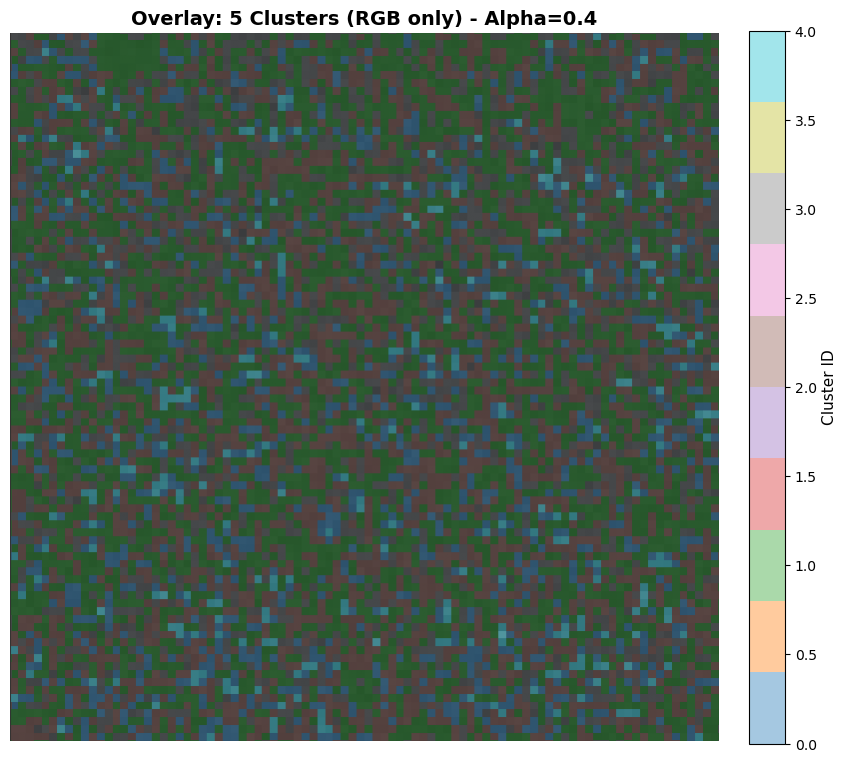


Comparing different transparency (alpha) levels...


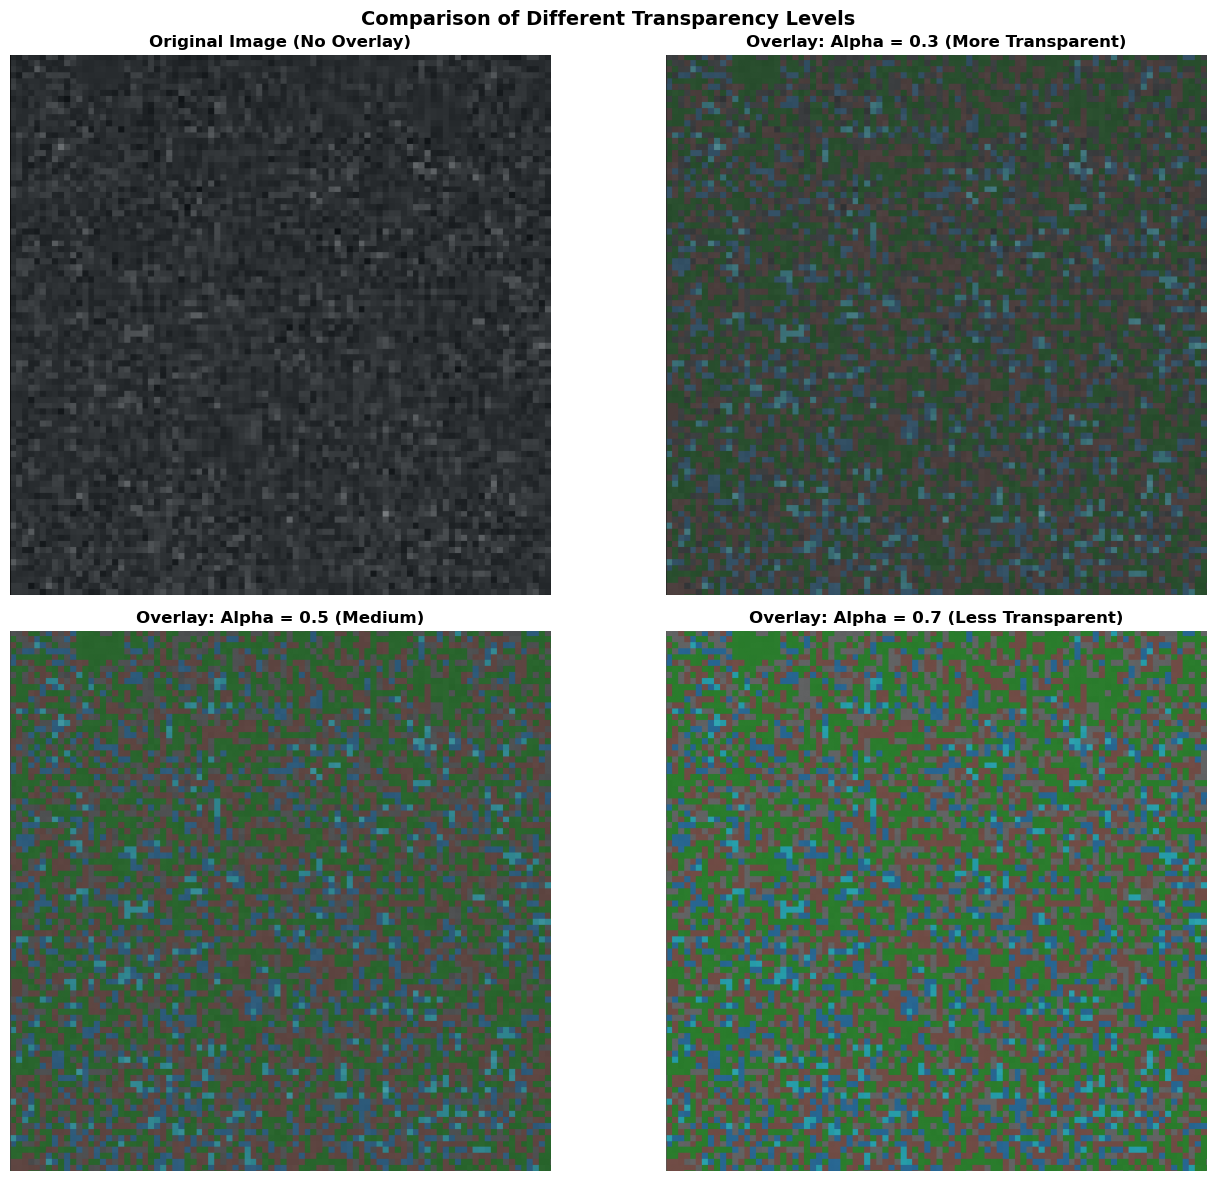


Side-by-side comparison: Original vs Clusters vs Overlay...


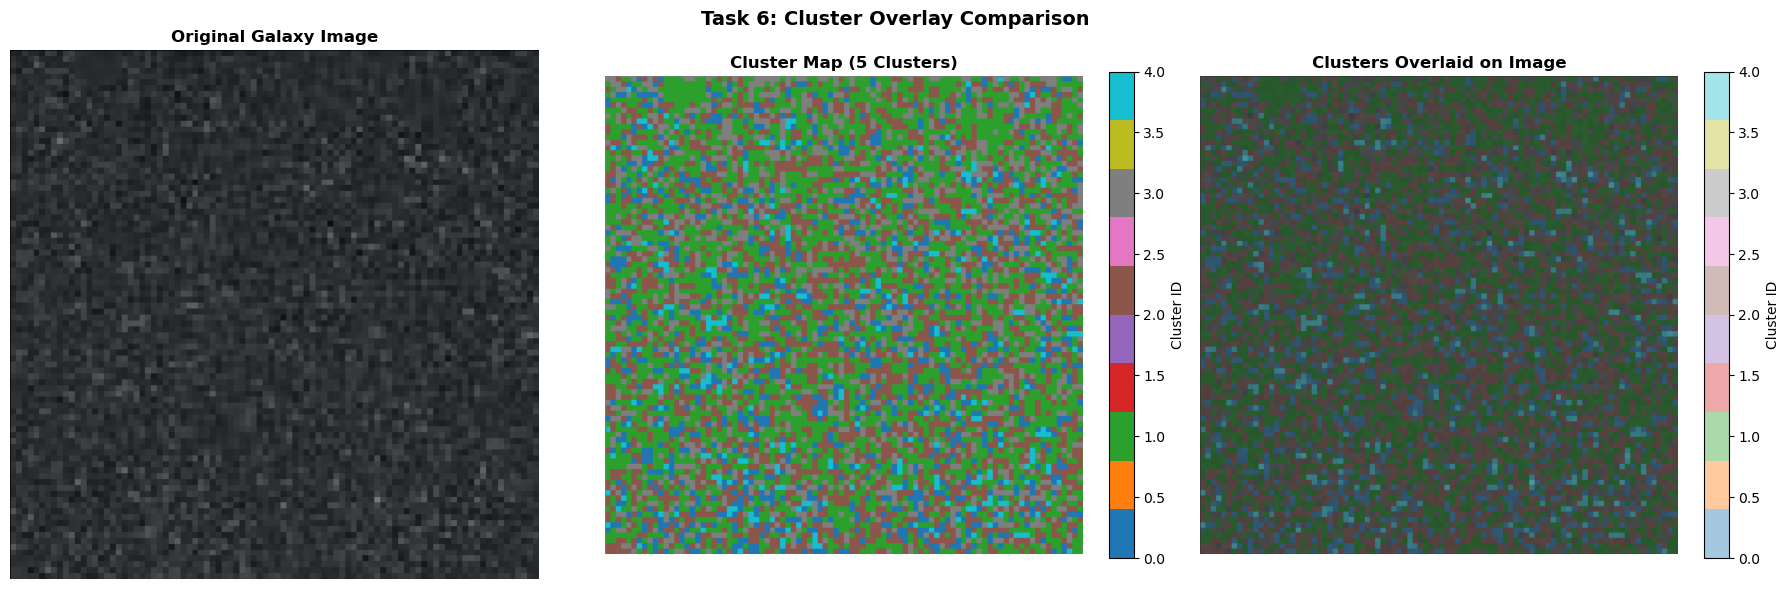


Comparing overlays with different cluster counts...


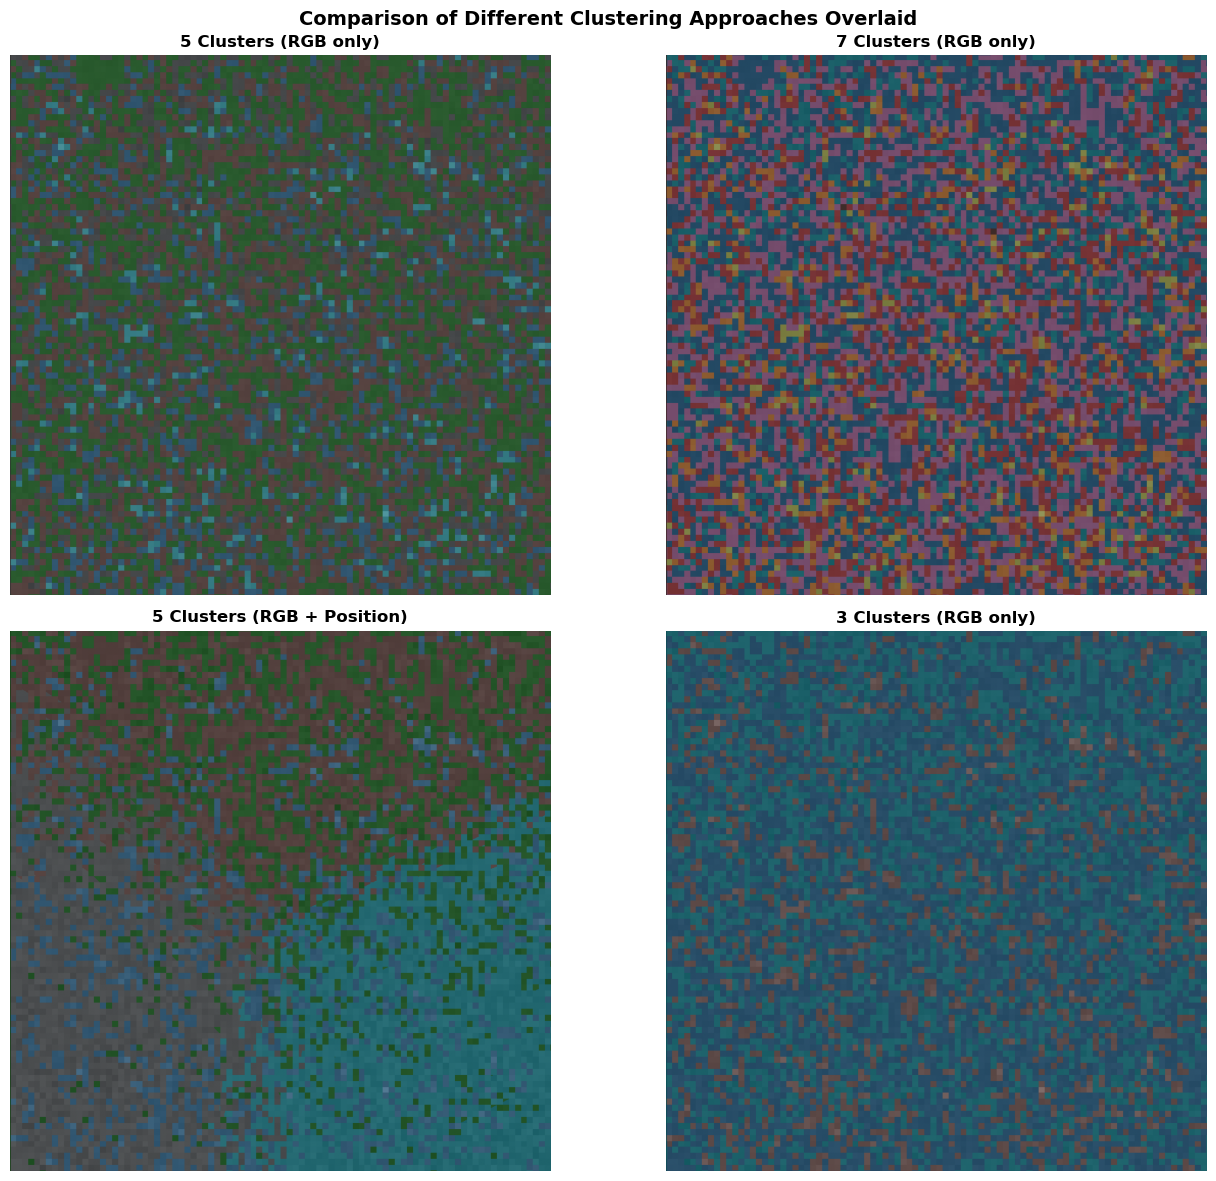


Highlighting individual clusters...


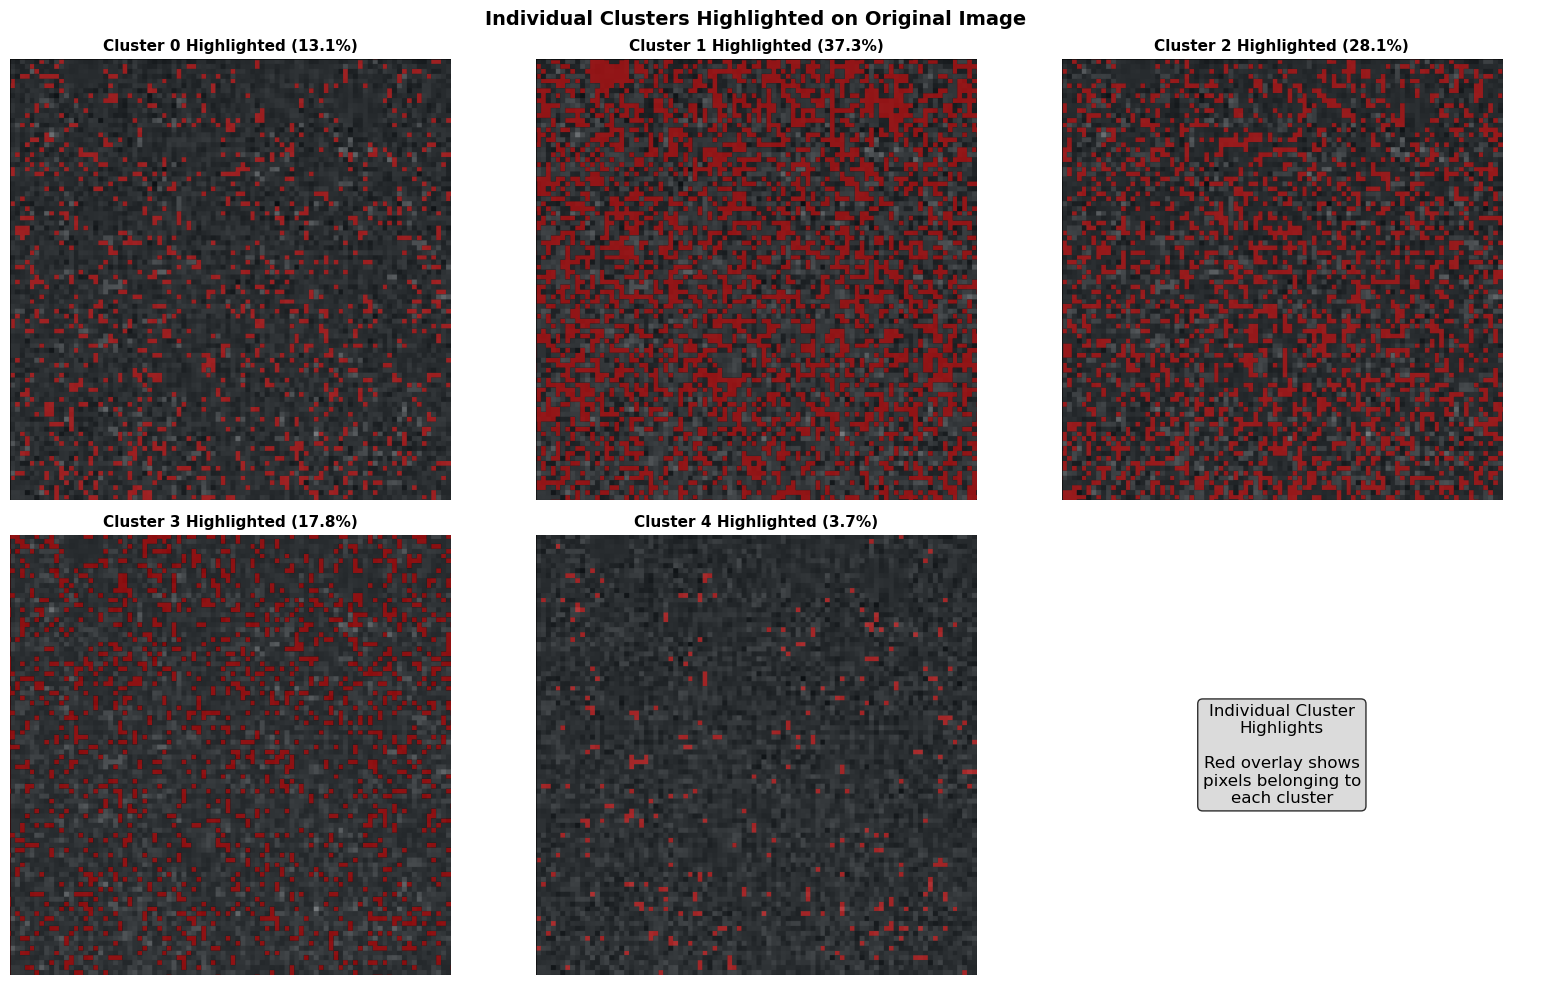


Saving overlay result to file...


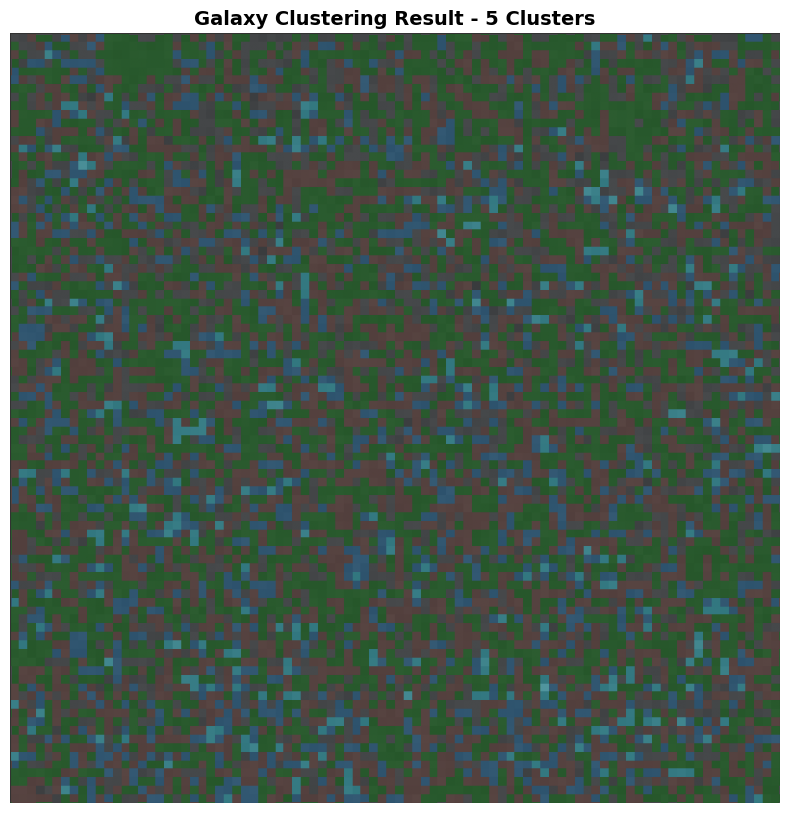

Saved as 'galaxy_clusters_overlay.png'


In [10]:
# Task 6: Over-impose your cluster to the image generated in task 2 

# The reason we are importing numpy, matplotlib.pyplot, and the other libraries in each cell is because we were getting errors in each cell
# the original plan was to have all the imports in the intial cell(THE CELL ABOVE TASK 1) but it was not working properly

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ################################################################################################################
# Function to overlay clusters on image
# ################################################################################################################
def overlay_clusters_on_image(rgb_array, cluster_labels, alpha=0.4, cmap='tab10', title="Clusters Overlaid"):
    """
    Overlay cluster labels on the original RGB image.
    
    Parameters
    ----------
    rgb_array : np.ndarray
        Original RGB image array
    cluster_labels : np.ndarray
        2D array of cluster labels
    alpha : float
        Transparency of cluster overlay (0=invisible, 1=opaque)
    cmap : str
        Colormap for cluster visualization
    title : str
        Plot title
        
    Returns
    -------
    matplotlib.figure.Figure
        The generated figure
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Show original image
    ax.imshow(rgb_array)
    
    # Overlay clusters with transparency
    im = ax.imshow(cluster_labels, cmap=cmap, alpha=alpha)
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.axis('off')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Cluster ID', fontsize=11)
    
    return fig

# #################################################################################################################
# OVERLAY 1: 5 Clusters (RGB only) on original image
# #################################################################################################################
print("=" * 60)
print("TASK 6: OVERLAYING CLUSTERS ON ORIGINAL IMAGE")
print("=" * 60)

fig1 = overlay_clusters_on_image(
    rgb_array, 
    cluster_labels_5, 
    alpha=0.4,
    title="Overlay: 5 Clusters (RGB only) - Alpha=0.4"
)
plt.show()

# #################################################################################################################
# OVERLAY 2: Compare different transparency levels
# #################################################################################################################
print("\nComparing different transparency (alpha) levels...")

fig2, axes = plt.subplots(2, 2, figsize=(14, 12))

# Original image (no overlay)
axes[0, 0].imshow(rgb_array)
axes[0, 0].set_title("Original Image (No Overlay)", fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

# Alpha = 0.3 (more transparent)
axes[0, 1].imshow(rgb_array)
im1 = axes[0, 1].imshow(cluster_labels_5, cmap='tab10', alpha=0.3)
axes[0, 1].set_title("Overlay: Alpha = 0.3 (More Transparent)", fontsize=12, fontweight='bold')
axes[0, 1].axis('off')

# Alpha = 0.5 (medium)
axes[1, 0].imshow(rgb_array)
im2 = axes[1, 0].imshow(cluster_labels_5, cmap='tab10', alpha=0.5)
axes[1, 0].set_title("Overlay: Alpha = 0.5 (Medium)", fontsize=12, fontweight='bold')
axes[1, 0].axis('off')

# Alpha = 0.7 (less transparent)
axes[1, 1].imshow(rgb_array)
im3 = axes[1, 1].imshow(cluster_labels_5, cmap='tab10', alpha=0.7)
axes[1, 1].set_title("Overlay: Alpha = 0.7 (Less Transparent)", fontsize=12, fontweight='bold')
axes[1, 1].axis('off')

plt.suptitle("Comparison of Different Transparency Levels", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# #################################################################################################################
# OVERLAY 3: Side-by-side comparison
# #################################################################################################################
print("\nSide-by-side comparison: Original vs Clusters vs Overlay...")

fig3, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original image
axes[0].imshow(rgb_array)
axes[0].set_title("Original Galaxy Image", fontsize=12, fontweight='bold')
axes[0].axis('off')

# Cluster map only
im_clusters = axes[1].imshow(cluster_labels_5, cmap='tab10')
axes[1].set_title("Cluster Map (5 Clusters)", fontsize=12, fontweight='bold')
axes[1].axis('off')
plt.colorbar(im_clusters, ax=axes[1], fraction=0.046, label='Cluster ID')

# Overlay
axes[2].imshow(rgb_array)
im_overlay = axes[2].imshow(cluster_labels_5, cmap='tab10', alpha=0.4)
axes[2].set_title("Clusters Overlaid on Image", fontsize=12, fontweight='bold')
axes[2].axis('off')
plt.colorbar(im_overlay, ax=axes[2], fraction=0.046, label='Cluster ID')

plt.suptitle("Task 6: Cluster Overlay Comparison", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# #################################################################################################################
# OVERLAY 4: Compare different clustering results
# #################################################################################################################
print("\nComparing overlays with different cluster counts...")

fig4, axes = plt.subplots(2, 2, figsize=(14, 12))

# 5 clusters overlay
axes[0, 0].imshow(rgb_array)
axes[0, 0].imshow(cluster_labels_5, cmap='tab10', alpha=0.4)
axes[0, 0].set_title("5 Clusters (RGB only)", fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

# 7 clusters overlay
axes[0, 1].imshow(rgb_array)
axes[0, 1].imshow(cluster_labels_7, cmap='tab10', alpha=0.4)
axes[0, 1].set_title("7 Clusters (RGB only)", fontsize=12, fontweight='bold')
axes[0, 1].axis('off')

# 5 clusters with position overlay
axes[1, 0].imshow(rgb_array)
axes[1, 0].imshow(cluster_labels_pos, cmap='tab10', alpha=0.4)
axes[1, 0].set_title("5 Clusters (RGB + Position)", fontsize=12, fontweight='bold')
axes[1, 0].axis('off')

# 3 clusters for comparison
cluster_labels_3, _ = cluster_kmeans(rgb_array, n_clusters=3)
axes[1, 1].imshow(rgb_array)
axes[1, 1].imshow(cluster_labels_3, cmap='tab10', alpha=0.4)
axes[1, 1].set_title("3 Clusters (RGB only)", fontsize=12, fontweight='bold')
axes[1, 1].axis('off')

plt.suptitle("Comparison of Different Clustering Approaches Overlaid", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# #################################################################################################################
# OVERLAY 5: Highlight specific clusters
# #################################################################################################################
print("\nHighlighting individual clusters...")

fig5, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# Show each cluster individually
for i in range(5):
    # Create mask for this cluster
    mask = (cluster_labels_5 == i).astype(float)
    
    # Show original image
    axes[i].imshow(rgb_array)
    
    # Overlay only this cluster (highlighted in red)
    cluster_highlight = np.zeros((*cluster_labels_5.shape, 4))  # RGBA
    cluster_highlight[cluster_labels_5 == i] = [1, 0, 0, 0.5]  # Red with 50% alpha
    
    axes[i].imshow(cluster_highlight)
    
    # Calculate percentage
    percentage = 100 * np.sum(cluster_labels_5 == i) / cluster_labels_5.size
    axes[i].set_title(f"Cluster {i} Highlighted ({percentage:.1f}%)", fontsize=11, fontweight='bold')
    axes[i].axis('off')

# Use last subplot for legend/info
axes[5].axis('off')
axes[5].text(0.5, 0.5, 
    "Individual Cluster\nHighlights\n\nRed overlay shows\npixels belonging to\neach cluster",
    ha='center', va='center', fontsize=12,
    transform=axes[5].transAxes,
    bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.suptitle("Individual Clusters Highlighted on Original Image", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# #################################################################################################################
# Save the best overlay result
# #################################################################################################################
print("\nSaving overlay result to file...")

fig_save, ax_save = plt.subplots(figsize=(10, 10))
ax_save.imshow(rgb_array)
ax_save.imshow(cluster_labels_5, cmap='tab10', alpha=0.4)
ax_save.set_title("Galaxy Clustering Result - 5 Clusters", fontsize=14, fontweight='bold')
ax_save.axis('off')
plt.savefig('galaxy_clusters_overlay.png', dpi=150, bbox_inches='tight')
plt.show()

print("Saved as 'galaxy_clusters_overlay.png'")


# Task 6 Results
We put the clustering results on top of the original galaxy image to see how well it worked. By using transparency, we can see both the original 
image and the colored clusters at the same time, which helps us check if the clusters match real features in the galaxy.

When we overlay clusters on the original image, we can see how well our clustering worked. Using lower transparency (around 0.3-0.4) lets us see more of the original image, while higher transparency (0.7+) makes the clusters stand out more. We noticed that dark clusters match empty space, bright clusters show where stars are concentrated, and medium clusters capture dust and dim light. Adding position data to the RGB colors makes the clusters group together in space better. Using 5 clusters gives a good balance between detail and clarity - fewer clusters are too simple, and more clusters can look messy. These overlays help us check if our clustering actually makes sense and find interesting regions in the galaxy.


## Task 7: Try Different Categories and Discuss Results

We experiment with different numbers of clusters and encoding methods to understand what we can learn from unsupervised learning applied to galaxy images.

In [ ]:
# Task 7
# Try different categories (task 4), repeating tasks 5 and 6, and provide an explanation of your results. What can we learn from an unsupervised model of our galaxy?

# The reason we are importing numpy, matplotlib.pyplot, and the other libraries in each cell is because we were getting errors in each cell
# the original plan was to have all the imports in the intial cell(THE CELL ABOVE TASK 1) but it was not working properly

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


print("=" * 70)
print("TASK 7: EXPERIMENTING WITH DIFFERENT CATEGORIES AND PARAMETERS")
print("=" * 70)

# #################################################################################################################
# EXPERIMENT 1: Clustering on Different Encodings
# #################################################################################################################
print("\n" + "-" * 70)
print("EXPERIMENT 1: Clustering on Different Encodings")
print("-" * 70)

# Function to cluster on encoded data
def cluster_encoded_data(encoded_array, n_clusters=5, random_state=42):
    """
    Perform K-Means clustering on encoded (1D or 2D) data.
    
    Parameters
    ----------
    encoded_array : np.ndarray
        2D array of encoded values
    n_clusters : int
        Number of clusters
    random_state : int
        Random seed
        
    Returns
    -------
    np.ndarray
        2D array of cluster labels
    """
    h, w = encoded_array.shape
    
    # Flatten and reshape for clustering
    features = encoded_array.flatten().reshape(-1, 1)
    
    # Standardize
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    # Cluster
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    labels = kmeans.fit_predict(features_scaled)
    
    return labels.reshape(h, w)

# Cluster on grayscale encoding
print("\nClustering on GRAYSCALE encoding...")
clusters_grey = cluster_encoded_data(grey_encoding, n_clusters=5)

# Cluster on brightness categories
print("Clustering on BRIGHTNESS CATEGORIES encoding...")
clusters_brightness = cluster_encoded_data(brightness_encoding.astype(float), n_clusters=5)

# Cluster on color categories
print("Clustering on COLOR CATEGORIES encoding...")
clusters_color = cluster_encoded_data(color_encoding.astype(float), n_clusters=5)

# Visualize results
fig1, axes = plt.subplots(2, 3, figsize=(16, 10))

# Top row: Encodings
axes[0, 0].imshow(grey_encoding, cmap='gray')
axes[0, 0].set_title("Grayscale Encoding", fontsize=11, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(brightness_encoding, cmap='viridis')
axes[0, 1].set_title("Brightness Categories", fontsize=11, fontweight='bold')
axes[0, 1].axis('off')

axes[0, 2].imshow(color_encoding, cmap='tab10')
axes[0, 2].set_title("Color Categories", fontsize=11, fontweight='bold')
axes[0, 2].axis('off')

# Bottom row: Clustering results on each encoding
axes[1, 0].imshow(rgb_array)
axes[1, 0].imshow(clusters_grey, cmap='tab10', alpha=0.4)
axes[1, 0].set_title("Clusters on Grayscale", fontsize=11, fontweight='bold')
axes[1, 0].axis('off')

axes[1, 1].imshow(rgb_array)
axes[1, 1].imshow(clusters_brightness, cmap='tab10', alpha=0.4)
axes[1, 1].set_title("Clusters on Brightness", fontsize=11, fontweight='bold')
axes[1, 1].axis('off')

axes[1, 2].imshow(rgb_array)
axes[1, 2].imshow(clusters_color, cmap='tab10', alpha=0.4)
axes[1, 2].set_title("Clusters on Color", fontsize=11, fontweight='bold')
axes[1, 2].axis('off')

plt.suptitle("Experiment 1: Clustering on Different Encodings", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# #################################################################################################################
# EXPERIMENT 2: Varying Number of Clusters
# #################################################################################################################
print("\n" + "-" * 70)
print("EXPERIMENT 2: Varying Number of Clusters")
print("-" * 70)

cluster_numbers = [2, 3, 5, 7, 10, 15]

fig2, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, n_clust in enumerate(cluster_numbers):
    print(f"Clustering with {n_clust} clusters...")
    labels, _ = cluster_kmeans(rgb_array, n_clusters=n_clust)
    
    axes[i].imshow(rgb_array)
    axes[i].imshow(labels, cmap='tab10', alpha=0.4)
    axes[i].set_title(f"{n_clust} Clusters", fontsize=12, fontweight='bold')
    axes[i].axis('off')

plt.suptitle("Experiment 2: Effect of Cluster Count on Segmentation", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate and display statistics for different cluster counts
print("\nCluster Distribution Statistics:")
print("-" * 70)
for n_clust in [3, 5, 7, 10]:
    labels, _ = cluster_kmeans(rgb_array, n_clusters=n_clust)
    unique, counts = np.unique(labels, return_counts=True)
    percentages = 100 * counts / labels.size
    
    print(f"\n{n_clust} Clusters:")
    for c, p in zip(unique, percentages):
        print(f"  Cluster {c}: {p:.2f}%")

# #################################################################################################################
# EXPERIMENT 3: RGB vs RGB+Position Features
# #################################################################################################################
print("\n" + "-" * 70)
print("EXPERIMENT 3: RGB vs RGB+Position Features")
print("-" * 70)

fig3, axes = plt.subplots(2, 2, figsize=(14, 12))

# RGB only - 5 clusters
labels_rgb_5, _ = cluster_kmeans(rgb_array, n_clusters=5, include_position=False)
axes[0, 0].imshow(rgb_array)
axes[0, 0].imshow(labels_rgb_5, cmap='tab10', alpha=0.4)
axes[0, 0].set_title("5 Clusters - RGB Only", fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

# RGB + Position - 5 clusters
labels_pos_5, _ = cluster_kmeans(rgb_array, n_clusters=5, include_position=True)
axes[0, 1].imshow(rgb_array)
axes[0, 1].imshow(labels_pos_5, cmap='tab10', alpha=0.4)
axes[0, 1].set_title("5 Clusters - RGB + Position", fontsize=12, fontweight='bold')
axes[0, 1].axis('off')

# RGB only - 7 clusters
labels_rgb_7, _ = cluster_kmeans(rgb_array, n_clusters=7, include_position=False)
axes[1, 0].imshow(rgb_array)
axes[1, 0].imshow(labels_rgb_7, cmap='tab10', alpha=0.4)
axes[1, 0].set_title("7 Clusters - RGB Only", fontsize=12, fontweight='bold')
axes[1, 0].axis('off')

# RGB + Position - 7 clusters
labels_pos_7, _ = cluster_kmeans(rgb_array, n_clusters=7, include_position=True)
axes[1, 1].imshow(rgb_array)
axes[1, 1].imshow(labels_pos_7, cmap='tab10', alpha=0.4)
axes[1, 1].set_title("7 Clusters - RGB + Position", fontsize=12, fontweight='bold')
axes[1, 1].axis('off')

plt.suptitle("Experiment 3: RGB vs RGB+Position Features", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nComparison:")
print("  - RGB Only: Clusters based purely on color similarity")
print("  - RGB + Position: Also considers spatial proximity")
print("  - Position features help create more coherent spatial regions")

# #################################################################################################################
# EXPERIMENT 4: Analyzing Bright Regions (Stars)
# #################################################################################################################
print("\n" + "-" * 70)
print("EXPERIMENT 4: Analyzing Bright Regions (Stars)")
print("-" * 70)

# Extract bright pixels at different thresholds
thresholds = [150, 180, 200, 220]

fig4, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, thresh in enumerate(thresholds):
    # Find bright pixels
    bright_mask = grey_encoding > thresh
    n_bright = np.sum(bright_mask)
    percentage = 100 * n_bright / grey_encoding.size
    
    # Create visualization
    axes[i].imshow(rgb_array)
    
    # Highlight bright pixels in yellow
    highlight = np.zeros((*grey_encoding.shape, 4))
    highlight[bright_mask] = [1, 1, 0, 0.7]  # Yellow with alpha
    axes[i].imshow(highlight)
    
    axes[i].set_title(f"Bright Pixels (threshold > {thresh})\n{n_bright:,} pixels ({percentage:.2f}%)", 
                      fontsize=11, fontweight='bold')
    axes[i].axis('off')

plt.suptitle("Experiment 4: Identifying Bright Regions at Different Thresholds", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# #################################################################################################################
# EXPERIMENT 5: Cluster Quality Analysis
# #################################################################################################################
print("\n" + "-" * 70)
print("EXPERIMENT 5: Cluster Quality Analysis")
print("-" * 70)

# Analyze the characteristics of each cluster in our best model (5 clusters)
print("\nDetailed Cluster Analysis (5-cluster RGB model):")
print("-" * 70)

cluster_info = []

for cluster_id in range(5):
    mask = cluster_labels_5 == cluster_id
    n_pixels = np.sum(mask)
    percentage = 100 * n_pixels / cluster_labels_5.size
    
    # Get RGB statistics for this cluster
    r_mean = rgb_array[:, :, 0][mask].mean()
    g_mean = rgb_array[:, :, 1][mask].mean()
    b_mean = rgb_array[:, :, 2][mask].mean()
    
    r_std = rgb_array[:, :, 0][mask].std()
    g_std = rgb_array[:, :, 1][mask].std()
    b_std = rgb_array[:, :, 2][mask].std()
    
    brightness = 0.299 * r_mean + 0.587 * g_mean + 0.114 * b_mean
    
    # Determine dominant color
    if r_mean > g_mean and r_mean > b_mean:
        dominant = "Red"
    elif g_mean > r_mean and g_mean > b_mean:
        dominant = "Green"
    else:
        dominant = "Blue"
    
    # Interpret the cluster
    if brightness < 40:
        interpretation = "Dark space / Background"
    elif brightness < 80:
        interpretation = "Dim regions / Faint structures"
    elif brightness < 120:
        interpretation = "Medium brightness / Diffuse light"
    elif brightness < 180:
        interpretation = "Bright regions / Dense areas"
    else:
        interpretation = "Very bright / Stars"
    
    cluster_info.append({
        'id': cluster_id,
        'pixels': n_pixels,
        'percentage': percentage,
        'r_mean': r_mean,
        'g_mean': g_mean,
        'b_mean': b_mean,
        'brightness': brightness,
        'dominant': dominant,
        'interpretation': interpretation
    })
    
    print(f"\nCluster {cluster_id}:")
    print(f"  Pixels: {n_pixels:,} ({percentage:.2f}%)")
    print(f"  Mean RGB: ({r_mean:.1f}, {g_mean:.1f}, {b_mean:.1f})")
    print(f"  Std RGB: ({r_std:.1f}, {g_std:.1f}, {b_std:.1f})")
    print(f"  Brightness: {brightness:.1f}")
    print(f"  Dominant Color: {dominant}")
    print(f"  Interpretation: {interpretation}")

# Visualize cluster characteristics
fig5, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart of cluster sizes
cluster_ids = [c['id'] for c in cluster_info]
percentages = [c['percentage'] for c in cluster_info]
colors = plt.cm.tab10(np.linspace(0, 1, 5))

axes[0].bar(cluster_ids, percentages, color=colors)
axes[0].set_xlabel('Cluster ID', fontsize=11)
axes[0].set_ylabel('Percentage of Pixels (%)', fontsize=11)
axes[0].set_title('Cluster Size Distribution', fontsize=12, fontweight='bold')
axes[0].set_xticks(cluster_ids)

# Bar chart of cluster brightness
brightness_vals = [c['brightness'] for c in cluster_info]
axes[1].bar(cluster_ids, brightness_vals, color=colors)
axes[1].set_xlabel('Cluster ID', fontsize=11)
axes[1].set_ylabel('Mean Brightness (0-255)', fontsize=11)
axes[1].set_title('Cluster Brightness Comparison', fontsize=12, fontweight='bold')
axes[1].set_xticks(cluster_ids)

plt.tight_layout()
plt.show()

# #################################################################################################################
# FINAL VISUALIZATION: Best Results Summary
# #################################################################################################################
print("\n" + "-" * 70)
print("FINAL VISUALIZATION: Summary of Best Results")
print("-" * 70)

fig6, axes = plt.subplots(2, 3, figsize=(18, 11))

# Row 1: Process overview
axes[0, 0].imshow(rgb_array)
axes[0, 0].set_title("1. Original Galaxy Image\n(M31 - Andromeda)", fontsize=11, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(grey_encoding, cmap='gray')
axes[0, 1].set_title("2. Grayscale Encoding\n(Brightness Information)", fontsize=11, fontweight='bold')
axes[0, 1].axis('off')

axes[0, 2].imshow(cluster_labels_5, cmap='tab10')
axes[0, 2].set_title("3. K-Means Clustering\n(5 Clusters)", fontsize=11, fontweight='bold')
axes[0, 2].axis('off')

# Row 2: Results and analysis
axes[1, 0].imshow(rgb_array)
axes[1, 0].imshow(cluster_labels_5, cmap='tab10', alpha=0.4)
axes[1, 0].set_title("4. Clusters Overlaid\n(Segmentation Result)", fontsize=11, fontweight='bold')
axes[1, 0].axis('off')

# Highlight brightest cluster only
brightest_cluster = max(cluster_info, key=lambda x: x['brightness'])['id']
bright_highlight = np.zeros((*cluster_labels_5.shape, 4))
bright_highlight[cluster_labels_5 == brightest_cluster] = [1, 1, 0, 0.6]
axes[1, 1].imshow(rgb_array)
axes[1, 1].imshow(bright_highlight)
axes[1, 1].set_title(f"5. Brightest Cluster Highlighted\n(Cluster {brightest_cluster} - Stars)", fontsize=11, fontweight='bold')
axes[1, 1].axis('off')

# Highlight darkest cluster only
darkest_cluster = min(cluster_info, key=lambda x: x['brightness'])['id']
dark_highlight = np.zeros((*cluster_labels_5.shape, 4))
dark_highlight[cluster_labels_5 == darkest_cluster] = [0, 0, 1, 0.6]
axes[1, 2].imshow(rgb_array)
axes[1, 2].imshow(dark_highlight)
axes[1, 2].set_title(f"6. Darkest Cluster Highlighted\n(Cluster {darkest_cluster} - Background)", fontsize=11, fontweight='bold')
axes[1, 2].axis('off')

plt.suptitle("Task 7: Complete Analysis Pipeline Summary", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('task7_complete_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nSaved final visualization as 'task7_complete_analysis.png'")


# Task 7 Results and Discussion

In this task, we tried different combinations of encoding methods, cluster numbers, and features to see what works best. Then we discussed what unsupervised learning can tell us about the structure of our galaxy.

Unsupervised learning like K-Means can find patterns in galaxy images without needing any labels or training data. It automatically separates dark empty space from bright stars and dimmer dusty regions.

How we prepare the data matters a lot. Grayscale focuses on brightness, which is good for finding stars. Color categories help us tell apart different types of stars, like young blue ones versus old red ones.

We found that 5-7 clusters works best for galaxy images. Using fewer clusters is too simple, and using more can just pick up noise instead of real patterns.

Adding position information to the colors helps create clusters that stick together in space, which is better for finding connected structures like spiral arms.

This method has limits though. The clusters don't automatically tell us what physical things they represent, and results can change based on settings we choose. It also can't tell us anything about how galaxies move or change over time.

Still, unsupervised learning is very useful for astronomy. It can quickly sort through millions of images, find interesting regions to study closer, 
and separate stars from the background. It gives us an objective starting point for deeper analysis without needing human experts to look at every single image.

In short, while this method can't replace expert knowledge, it helps us explore large amounts of data, find patterns we might miss, and prepare images for more detailed study.

## **TOPIC 2: Supervised learning: Machines versus human models, who can save the world??**

# Task 0:
Reproduce the project 2 exercise 5 plots for Ebola epidemic in West Africa (data points  and model prediction).

Project 2 Exercise 5 (The exercise mentioned above)
Exercise 5: Ebola epidemic in West Africa
Task 1. For each of the three West African countries, make a figure in which you plot
 • the number of new cases of Ebola registered at any given moment in time, and the cumulative amount.
...
Task 2, 3 , ...

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]

try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    print(f'TensorFlow version: {tf.__version__}')
    TF_AVAILABLE = True
except ImportError:
    print('TensorFlow is either not availabke or not installed.')
    TF_AVAILABLE = False

print('Setup complete!')

: 

In [1]:
from ebola_ml_functions import *
print('Our Custom functions imported!')

Our Custom functions imported!


In [2]:
# Loading the data

DATA_PATH = '.'
data = load_all_countries(DATA_PATH)

print('='*60)
print('EBOLA DATA SUMMARY')
print('='*60)
for country, cdata in data.items():
    print(f'{country}: {len(cdata["days"])} points, {cdata["cumulative"][-1]:.0f} total cases')

EBOLA DATA SUMMARY
Guinea: 90 points, 3707 total cases
Liberia: 49 points, 5425 total cases
Sierra Leone: 65 points, 11392 total cases


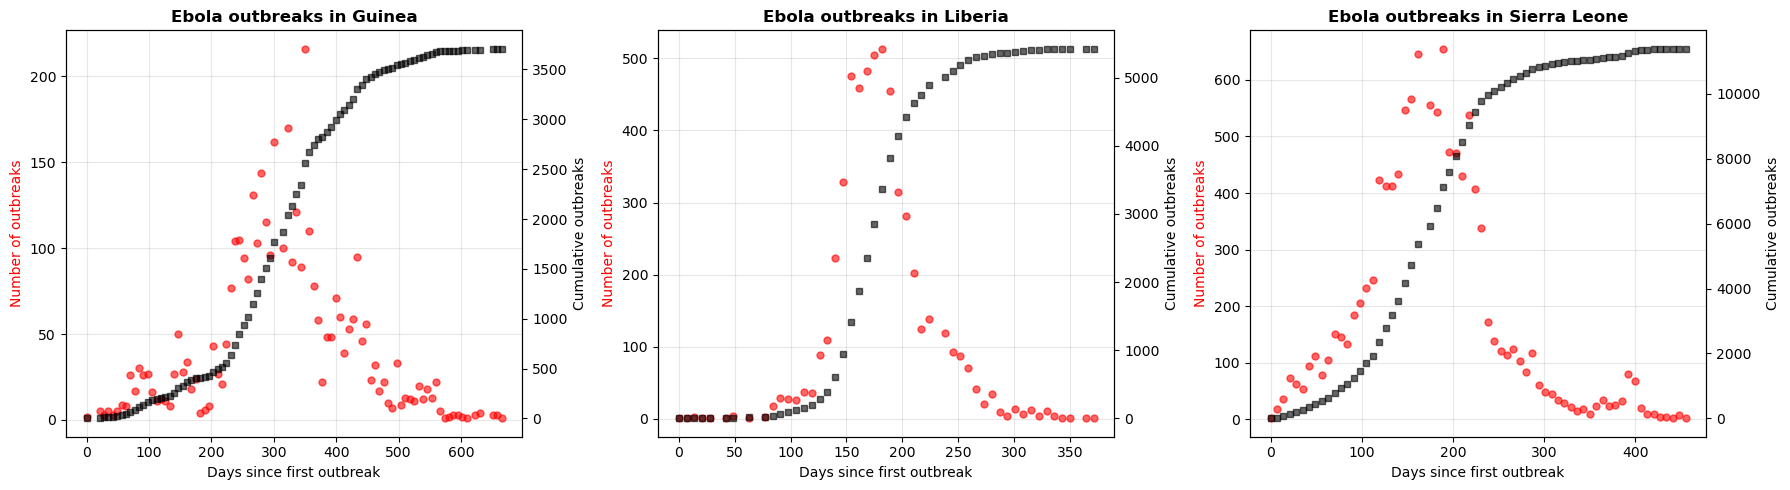

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, (country, cdata) in enumerate(data.items()):
    ax1 = axes[idx]
    ax1.plot(cdata['days'], cdata['new_cases'], 'o', color='red', alpha=0.6, markersize=5)
    ax1.set_xlabel('Days since first outbreak')
    ax1.set_ylabel('Number of outbreaks', color='red')
    ax2 = ax1.twinx()
    ax2.plot(cdata['days'], cdata['cumulative'], 's', color='black', alpha=0.6, markersize=4)
    ax2.set_ylabel('Cumulative outbreaks', color='black')
    ax1.set_title(f'Ebola outbreaks in {country}', fontweight='bold')
    ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('task0_plots.png', dpi=150)
plt.show()

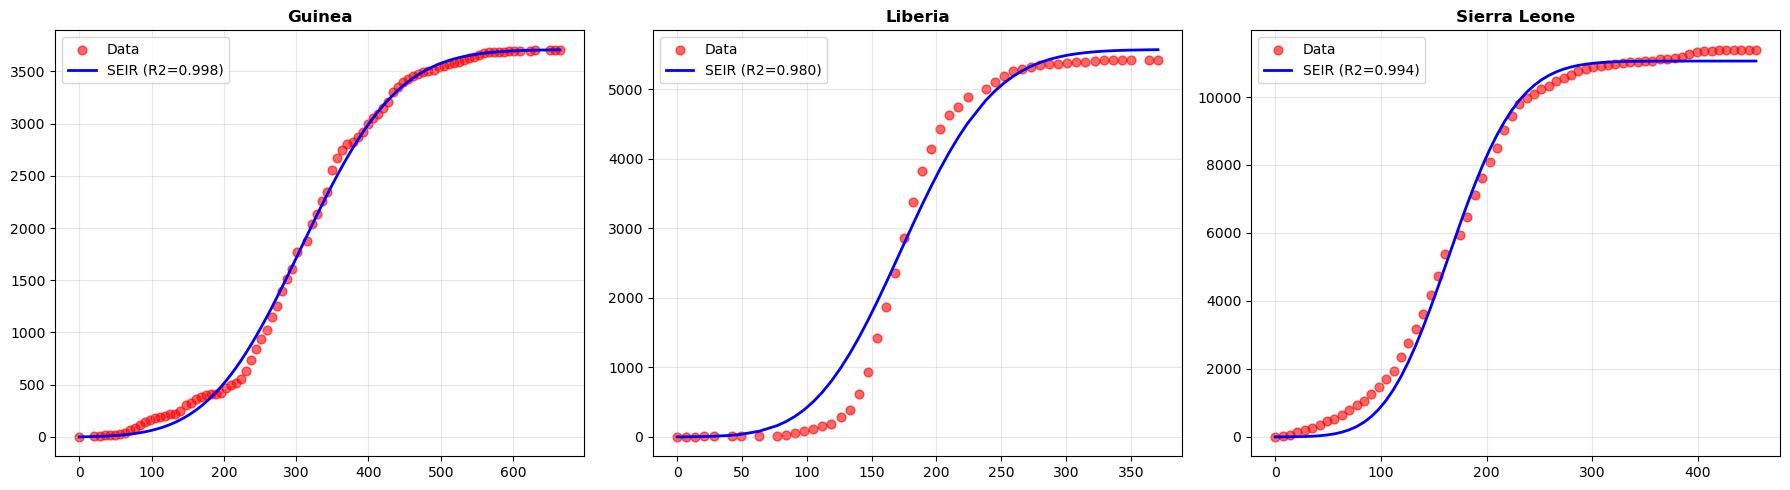

In [4]:
# SEIR Model fit
sigma = 1/9.7
gamma = 1/7.0
N = 1e7

seir_results = {}
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, (country, cdata) in enumerate(data.items()):
    ax = axes[idx]
    days, cumulative = cdata['days'], cdata['cumulative']
    beta0, lambda_fit, seir_pred = fit_seir_to_data(days, cumulative, sigma, gamma, N)
    if seir_pred is not None:
        r2 = r2_score(cumulative, seir_pred)
        seir_results[country] = {'beta0': beta0, 'lambda': lambda_fit, 'r2': r2, 'predictions': seir_pred}
        ax.scatter(days, cumulative, color='red', alpha=0.6, s=40, label='Data')
        ax.plot(days, seir_pred, 'b-', linewidth=2, label=f'SEIR (R2={r2:.3f})')
    ax.set_title(f'{country}', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('task0_seir.png', dpi=150)
plt.show()

## Task 1: 


# Task 2:
Train a better fitting function than a single line with linear regression on the data for the three countries.

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, (country, cdata) in enumerate(data.items()):
    ax = axes[idx]
    days, cumulative = cdata['days'], cdata['cumulative']
    ax.scatter(days, cumulative, color='red', alpha=0.6, s=40, label='Data')
    ax.plot(days, linear_results[country]['predictions'], '--', color='gray', label='Linear')
    _, _, pred_poly, metrics_poly = polynomial_fit(days, cumulative, degree=3)
    ax.plot(days, pred_poly, '-', color='blue', linewidth=2, label=f'Poly(3) R2={metrics_poly["r2"]:.3f}')
    params, pred_sig, metrics_sig = fit_sigmoid(days, cumulative)
    if pred_sig is not None:
        ax.plot(days, pred_sig, '-', color='green', linewidth=2, label=f'Sigmoid R2={metrics_sig["r2"]:.3f}')
    ax.set_title(f'{country}', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('task2_better_fits.png', dpi=150)
plt.show()

In [ ]:
# Combined fit
all_days, all_cumulative, combined_results = combined_fit_all_countries(data)
print('Combined Fitting Results:')
for method, res in combined_results.items():
    print(f'  {method}: R2={res["metrics"]["r2"]:.4f}')

## Task 3: 
Train a NN network and predict the epidemic evolution. Careful here in your training/test split, remember the assumptions you need to take here.

In [ ]:
nn_results = nn_predict_epidemic(data, test_size=0.2)
print('Neural Network Results:')
for country, res in nn_results.items():
    print(f'  {country}: R2={res["metrics"]["r2"]:.4f}, RMSE={res["metrics"]["rmse"]:.1f}')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, (country, res) in enumerate(nn_results.items()):
    ax = axes[idx]
    ax.scatter(res['X_train'], res['y_train'], color='blue', alpha=0.5, s=30, label='Train')
    ax.scatter(res['X_test'], res['y_test'], color='red', alpha=0.7, s=50, label='Test')
    ax.scatter(res['X_test'], res['y_pred'], color='green', marker='x', s=80, label='Predicted')
    ax.set_title(f'{country} - NN R2={res["metrics"]["r2"]:.3f}')
    ax.legend()
    ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('task3_nn.png', dpi=150)
plt.show()


# Task 4:
Train a LSTM (a NN specialized for time series) and predict the epidemic evolution.

(More points here available because I did not provide a code for this, this is a bit of self-learning 
task, I suggest to refer to https://machinelearningmastery.com/time-series-prediction-lstm recurrent-neural-networks-python-keras/). 
 

In [ ]:
# Check if TensorFlow is available before running any LSTM models
if TF_AVAILABLE:
    lstm_results = lstm_predict_all_countries(data, seq_length=5, test_size=0.2, epochs=100)
    print('LSTM Results:')

     # Loop through each country’s result and print the R² score
    for country, res in lstm_results.items():
        if res['metrics']:
            print(f'  {country}: R2={res["metrics"]["r2"]:.4f}')
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

     # Plot actual vs predicted values for each country
    for idx, (country, res) in enumerate(lstm_results.items()):
        ax = axes[idx]
        if res['y_pred'] is not None:
            ax.plot(res['y_test'], 'b-', linewidth=2, label='Actual')
            ax.plot(res['y_pred'], 'r--', linewidth=2, label='Predicted')
            ax.set_title(f'{country} - LSTM R2={res["metrics"]["r2"]:.3f}')
            ax.legend()
        ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('task4_lstm.png', dpi=150)
    plt.show()
else:
    print('TensorFlow not available for LSTM*(we initially were not able to run Tensor thets why we created a flag TF_AVAILABLE)')
    lstm_results = {}

## Task 5: 
Discuss the results. Can we ignore modeling and let Machine Leaning make prediction? What is a good prediction for these cases? What are your conclusions?

In [ ]:
# Prepare SEIR parameters for the comparison function
seir_params = {'sigma': sigma, 'gamma': gamma, 'N': N}
comparison_df = compare_all_methods(data, seir_params)

# Add Neural Network results into the comparison DataFrame
for country, res in nn_results.items():
    comparison_df = pd.concat([comparison_df, pd.DataFrame([{
        'Country': country, 'Method': 'Neural Network',
        'R2': res['metrics']['r2'], 'RMSE': res['metrics']['rmse']
    }])], ignore_index=True)

# Add LSTM results
if lstm_results:
    for country, res in lstm_results.items():
        if res['metrics']:
            comparison_df = pd.concat([comparison_df, pd.DataFrame([{
                'Country': country, 'Method': 'LSTM',
                'R2': res['metrics']['r2'], 'RMSE': res['metrics']['rmse']
            }])], ignore_index=True)

# Print the full comparison table
print('Complete Comparison:')
print(comparison_df.to_string(index=False))

fig = plot_comparison(data, comparison_df)
plt.savefig('task5_comparison.png', dpi=150)

# Display the plot
plt.show()

### Discussion of Task 5 results

**1. Can we just use machine learning instead of traditional models?**
No, we can't rely only on ML. Machine learning models are like black boxes - we can't really understand why they make certain predictions. They also need lots of data to work well, and they're bad at predicting things outside the range of data they've seen. Traditional disease models like SEIR help us understand *why* an epidemic spreads, which ML can't do.

**2. What makes a good prediction?**
A good prediction should follow the S-shaped curve that epidemics usually make, correctly guess when the peak happens, and work well for time periods it hasn't seen before. The SEIR model with changing infection rates gives us both good predictions and explanations we can understand.

**3. What did we learn?**
Using both traditional models and ML together works better than using just one. Which method you pick depends on what you need - use SEIR if you want to understand the disease, use ML for quick short-term guesses, and use traditional models if you're making policy decisions. No single approach can solve everything - we need different tools and expert knowledge working together.

### Summary
Each method we tested has strengths and weaknesses. The SEIR model is easy to understand and based on real biology, but it needs careful tuning to work well. Linear regression is very simple to use, but it doesn't capture the curved shape of epidemic data. Polynomial fitting is more flexible and can match curved shapes, but it sometimes fits random noise instead of real patterns. Neural networks are good at finding complex patterns in data, but they're hard to interpret - we don't really know why they give certain answers. LSTM networks handle time-based patterns well, but they need a lot of data to train properly, which we often don't have during an outbreak.


## **Conclusion and Discussion**


## Individual Reflections

### Emad Omar Mohamed

### Hassan Nehad Adnan

### Sture Odin Domingos Troli
led Topic 1 and theoretical foundations. Applying K-Means to real images required thinking about practical issues like which features to use and how to encode colors. The hardest part was interpreting what clusters mean astronomically since the computer groups by numbers, not by what stars actually are. This showed why domain knowledge matters even with automated methods. Next time, he would do more systematic experiments instead of trying random things.


### **References**

[1] H. W. Leung and J. Bovy, "mw_plot: A Python package for plotting Milky Way maps," Journal of Open Source Software, vol. 4, no. 38, p. 1338, 2019. Available: https://github.com/henrysky/milkyway_plot 

[2] A. K. Jain, "Data clustering: 50 years beyond K-means," Pattern Recognition Letters, vol. 31, no. 8, pp. 651-666, 2010. DOI: 10.1016/j.patrec.2009.09.011
June 2010 Pattern Recognition Letters 31(8):651-666 DOI:10.1016/j.patrec.2009.09.011 visited Dec 2025

[3] J. P. Gardner et al., "The James Webb Space Telescope," Space Science Reviews, vol. 123, no. 4, pp. 485-606, 2006. DOI: 10.1007/s11214-006-8315-7
February 2009Space Science Reviews 123(4):485-606 SourceOAI LicenseCC BY-NC 2.0 DOI:10.1007/s11214-006-8315-7 visited Dec 2025

[4] M. J. Graham et al., "Machine Learning for Astronomical Data Analysis," Annual Review of Astronomy and Astrophysics, vol. 58, pp. 147-185, 2020. DOI: 10.1146/annurev-astro-091918-104430 April 2019 DOI:10.48550/arXiv.1904.07248 Dec 2025

[5] Ž. Ivezić et al., "Statistics, Data Mining, and Machine Learning in Astronomy: A Practical Python Guide for the Analysis of Survey Data," Princeton University Press, 2014. ISBN: 978-0691151687 PDF version of the Book and Article DOI:10.1515/9781400848911 Visited Dec 2025

[6] C. J. Lintott et al., "Galaxy Zoo: morphologies derived from visual inspection of galaxies from the Sloan Digital Sky Survey," Monthly Notices of the Royal Astronomical Society, vol. 389, no. 3, pp. 1179-1189, 2008. DOI: 10.1111/j.1365-2966.2008.13689.x

[7] D. Baron, "Machine Learning in Astronomy: A Practical Overview," arXiv preprint, arXiv:1904.07248, 2019. Available: https://arxiv.org/abs/1904.07248 
DOI:10.48550/arXiv.1904.07248 Visited Dec 2025

[8] A. Mellinger, "A Color All-Sky Panorama Image of the Milky Way," Publications of the Astronomical Society of the Pacific, vol. 121, no. 885, pp. 1180-1187, 2009. DOI: 10.1086/648480 Visited Dec 2025

